# **I. DETERMINING THE PROBLEM**

- CREDIT RISK PREDICTION
- Supervised Learning Algorithm
- ***INPUT***: Information of customers in need of loans
- ***OUTPUT***: Predict default
- **Theoretical basis:**
   Personal credit is a form of credit under which a bank transfers the right to use capital to an individual or household with an individual business registration for a certain period of time at a certain cost for the purpose of serving life or serving production and business in the form of individual business households.
   A customer's ability to repay is the ability of the customer to repay the loan in full to the lender. Currently, there is no unified definition of the concept of "solvency", but there are only signs of a customer's "inability to repay", that is:
     
     *   The customer's inability to fulfill the payment obligation in full when due without taking into account the bank's sale of assets (if any) to repay;
     *   Customers with bad debts that are overdue for more than 90 days In particular, overdrafts are considered overdue when customers exceed the limit or are informed that the limit is smaller than the current outstanding balance.

   Through the definition of the IMF and the signs described by the Basel II Treaty, it is common for customers to incur bad debts, which means that they are unable to repay their debts. In order to unify the understanding in the whole thesis, the unified research on assessing the "debt repayment ability" of customers will be assessed through the highest debt group at credit institutions with customers having credit relations. Customers who currently have debts in groups 3, 4, and 5 are understood as customers who are unable to repay; the remaining cases are understood as customers who are able to repay.



# **II. EXPLORATORY DATA ANALYSIS (EDA)**

## **1. Import dataset and libraries**

In [ ]:
# Import dataset and libraries
import pandas as pd # thư viện làm việc với data frame
import seaborn as sns # vẽ hình
import numpy as np # thư viện làm việc với con số
import matplotlib.pyplot as plt # vẽ hình

file_path = "/content/Data_credit.xlsx"
data = pd.read_excel(file_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from copy import deepcopy
data_0 = deepcopy(data)

In [ ]:
data_0.head(5)

ID khách hàng     Khả năng trả nợ Giới tính  Độ tuổi Tình trạng hôn nhân  \
0              0  0. Trả nợ đúng hạn     0. Nữ       37      1. Có gia đình   
1              1  0. Trả nợ đúng hạn     0. Nữ       41      1. Có gia đình   
2              2  0. Trả nợ đúng hạn    1. Nam       33      1. Có gia đình   
3              3  0. Trả nợ đúng hạn    1. Nam       36      1. Có gia đình   
4              4  0. Trả nợ đúng hạn    1. Nam       35      1. Có gia đình   

   Tình trạng công việc hiện tại (số năm kinh nghiệm)  Thu nhập  \
0                                                7.0   30000000   
1                                                8.0   35000000   
2                                                6.0   35000000   
3                                                7.0   35000000   
4                                                5.0   35000000   

   Chi tiêu (trung bình một tháng)  Hóa đơn tiền điện        Tài sản thế chấp  \
0                         15000000           600000.0  0. Có tài sản thế chấp   
1                         19000000           650000.0  0. Có tài sản thế chấp   
2                         20000000           600000.0  0. Có tài sản thế chấp   
3                          4500000           750000.0  0. Có tài sản thế chấp   
4                          4500000           650000.0  0. Có tài sản thế chấp   

  Tình trạng sở hữu nhà ở  Số tiền dự kiến vay  Mục đích vay  \
0      0. Đã sở hữu nhà ở            250000000  1. Tiêu dùng   
1      0. Đã sở hữu nhà ở            250000000  1. Tiêu dùng   
2      0. Đã sở hữu nhà ở            350000000  1. Tiêu dùng   
3      0. Đã sở hữu nhà ở            300000000  1. Tiêu dùng   
4      0. Đã sở hữu nhà ở            350000000  1. Tiêu dùng   

   Thời hạn khoản vay                Chứng minh thu nhập  \
0                  12  0. Có giấy tờ chứng minh thu nhập   
1                  12  0. Có giấy tờ chứng minh thu nhập   
2                  12  0. Có giấy tờ chứng minh thu nhập   
3                  12  0. Có giấy tờ chứng minh thu nhập   
4                   8  0. Có giấy tờ chứng minh thu nhập   

   Số thành viên phụ thuộc trong gia đình Trình độ học vấn  
0                                       1       2. Thạc sĩ  
1                                       2       3. Đại học  
2                                       2       2. Thạc sĩ  
3                                       2       1. Tiến sĩ  
4                                       3       1. Tiến sĩ

## **2. Viewing number and types of features in dataset**

In [ ]:
# Kiểm tra các features (số lượng, kiểu dữ liệu)
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   ID khách hàng                                       3006 non-null   int64  
 1   Khả năng trả nợ                                     3006 non-null   object 
 2   Giới tính                                           3006 non-null   object 
 3   Độ tuổi                                             3006 non-null   int64  
 4   Tình trạng hôn nhân                                 2992 non-null   object 
 5   Tình trạng công việc hiện tại (số năm kinh nghiệm)  2990 non-null   float64
 6   Thu nhập                                            3006 non-null   int64  
 7   Chi tiêu (trung bình một tháng)                     3006 non-null   int64  
 8   Hóa đơn tiền điện                                   2992 non-null   float64
 9

* The dataset includes:
            ♦ 3006 hypothetical cases of applying for loans at credit institutions and banks.
            ♦ 15 explanatory variables (except the variable “ID khách hàng).
* 7 attribute variables have a data type of int64.
* 8 attribute variables have data type of object.
* 2 attribute variables have data type of float64.
* The attributes with missing values are: “Tình trạng hôn nhân”, “Tình trạng công việc hiện tại (số năm kinh nghiệm)”, “Hóa đơn tiền điện”, “Trình độ học vấn”.


In [ ]:
# Xóa cột ID khách hàng vì không có ý nghĩa
data_1 = pd.DataFrame(data_0)
data_1 = data_0.iloc[:,1:]

## **3. Descriptive Statistics**

### **a) Numerical Data Analysis**

In [ ]:
# Số biến có dữ liệu dạng số
numerical_features = ['Độ tuổi', 'Tình trạng công việc hiện tại (số năm kinh nghiệm)', 'Thu nhập', 'Chi tiêu (trung bình một tháng)',
                        'Hóa đơn tiền điện', 'Số tiền dự kiến vay', 'Thời hạn khoản vay', 'Số thành viên phụ thuộc trong gia đình']
print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  8


In [ ]:
# Thống kê mô tả các biến số
data_1[numerical_features].describe()

Độ tuổi  Tình trạng công việc hiện tại (số năm kinh nghiệm)  \
count  3006.000000                                        2990.000000    
mean     36.365935                                           5.175251    
std      11.200004                                           3.865598    
min      19.000000                                           0.000000    
25%      26.000000                                           2.000000    
50%      35.000000                                           4.000000    
75%      46.000000                                           7.000000    
max      60.000000                                          24.000000    

           Thu nhập  Chi tiêu (trung bình một tháng)  Hóa đơn tiền điện  \
count  3.006000e+03                     3.006000e+03       2.992000e+03   
mean   2.687435e+07                     8.018328e+07       4.650780e+05   
std    1.849750e+07                     7.196772e+08       5.419622e+05   
min    3.000000e+06                     1.000000e+06       9.000000e+04   
25%    1.500000e+07                     3.000000e+06       1.900000e+05   
50%    2.700000e+07                     5.000000e+06       3.500000e+05   
75%    3.500000e+07                     1.500000e+07       6.500000e+05   
max    4.500000e+08                     7.500000e+09       2.000000e+07   

       Số tiền dự kiến vay  Thời hạn khoản vay  \
count         3.006000e+03         3006.000000   
mean          3.529910e+08           19.924484   
std           4.097955e+08           16.457092   
min           2.000000e+07            5.000000   
25%           7.500000e+07            8.000000   
50%           1.500000e+08           12.000000   
75%           5.000000e+08           24.000000   
max           2.000000e+09           84.000000   

       Số thành viên phụ thuộc trong gia đình  
count                             3006.000000  
mean                                 1.697605  
std                                  1.359030  
min                                  0.000000  
25%                                  1.000000  
50%                                  1.000000  
75%                                  3.000000  
max                                  4.000000

<ipython-input-17-87873554f71b>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age, ax=axes[0, 0])
<ipython-input-17-87873554f71b>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(experience, ax=axes[0, 1])
<ipython-input-17-87873554f71b>:22: UserWarning: 

`distplot` is a deprecated functio

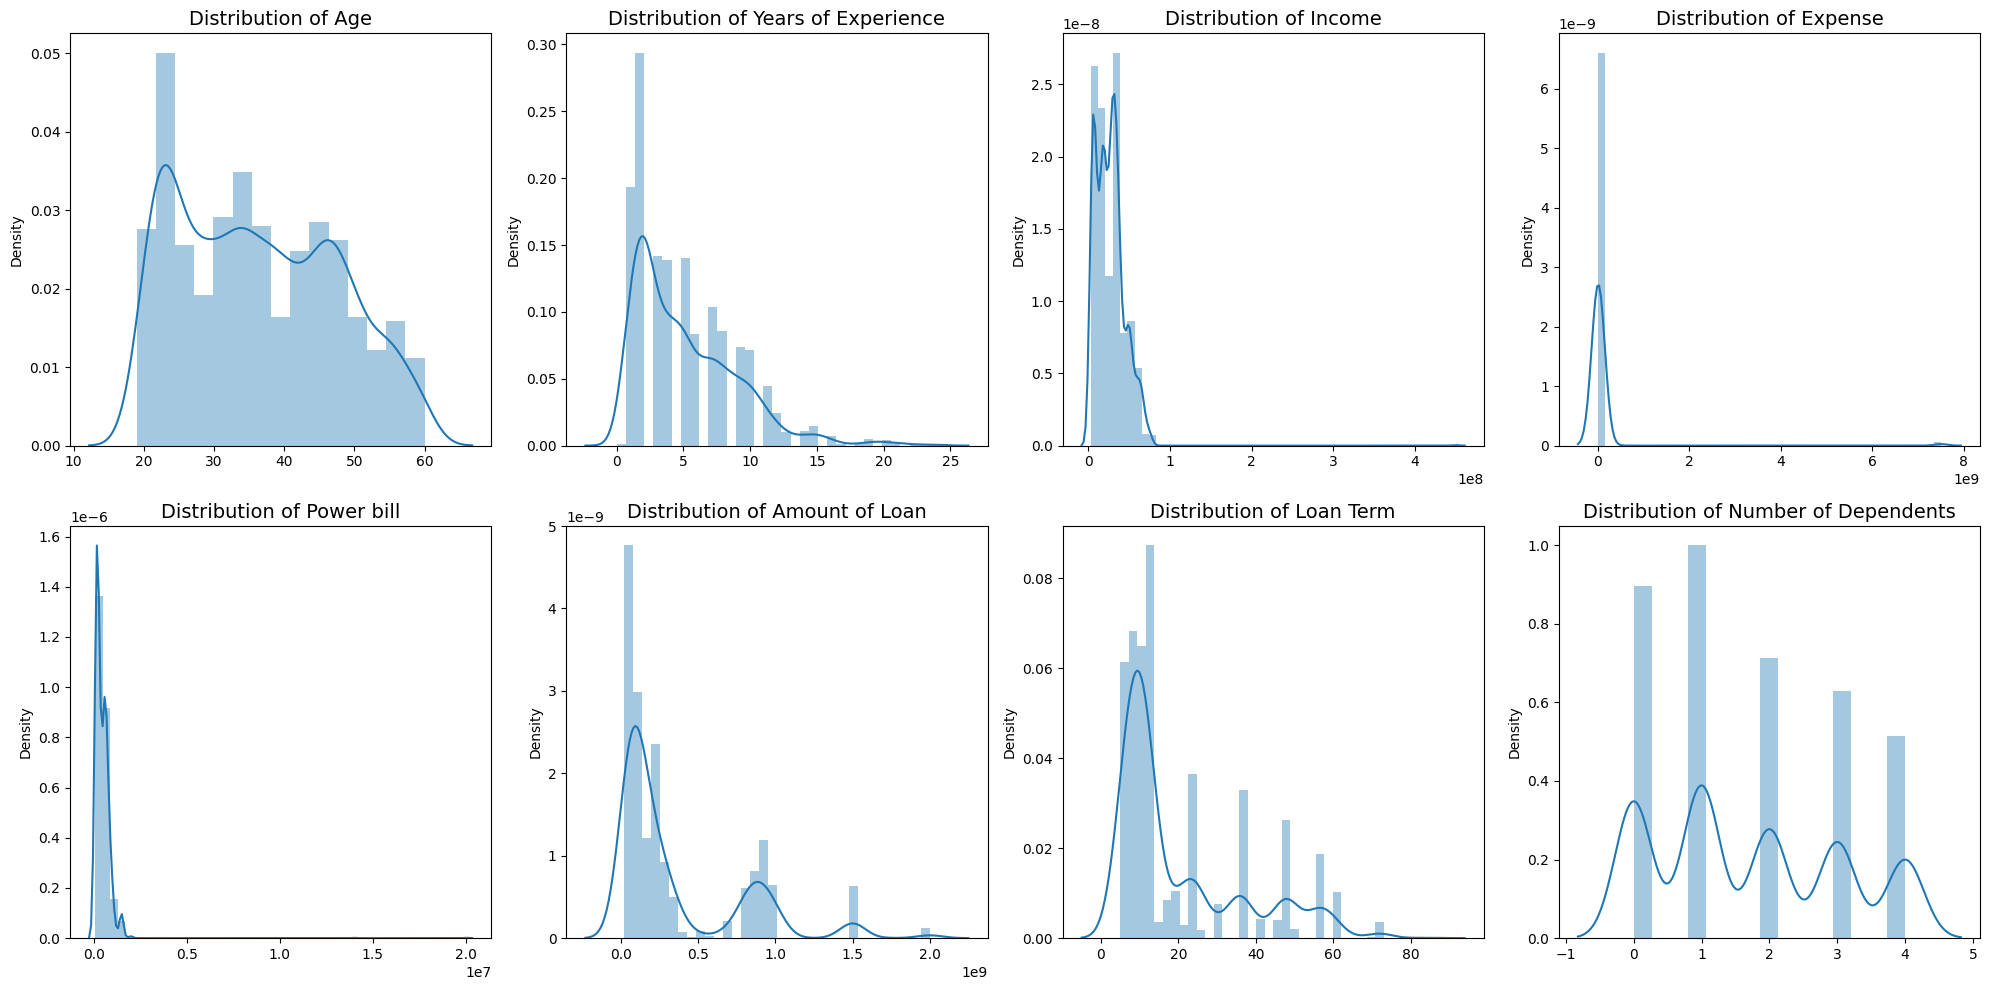

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

age = data_1['Độ tuổi'].values
experience = data_1['Tình trạng công việc hiện tại (số năm kinh nghiệm)'].values
income = data_1['Thu nhập'].values
expense = data_1['Chi tiêu (trung bình một tháng)'].values
power_bill = data_1['Hóa đơn tiền điện'].values
loan = data_1['Số tiền dự kiến vay'].values
term = data_1['Thời hạn khoản vay'].values
dependents = data_1['Số thành viên phụ thuộc trong gia đình'].values

# Plotting the distributions
sns.distplot(age, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age', fontsize=14)

sns.distplot(experience, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Years of Experience', fontsize=14)

sns.distplot(income, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Income', fontsize=14)

sns.distplot(expense, ax=axes[0, 3])
axes[0, 3].set_title('Distribution of Expense', fontsize=14)

sns.distplot(power_bill, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Power bill', fontsize=14)

sns.distplot(loan, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Amount of Loan', fontsize=14)

sns.distplot(term, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Loan Term', fontsize=14)

sns.distplot(dependents, ax=axes[1, 3])
axes[1, 3].set_title('Distribution of Number of Dependents', fontsize=14)

# Adjusting the subplots spacing
plt.tight_layout()

plt.show()

* “Độ tuổi”: The sample of research customers is from 19 to 60 years old, the average age of all customers is 36 years old.
* “Tình trạng công việc hiện tại (số năm kinh nghiệm)”: Borrowers have years of experience (professional seniority) between 0 and 24 years, with an average of 5 years of experience.
* “Thu nhập”: The income level of borrowers ranges from 3 million VND to 450 million VND, of which the average income is 27 million VND showing that borrowers have a relatively high income.
* “Chi tiêu (trung bình một tháng)”: Consumer spending in a month ranges from 1 million VND to 75 million VND, with an average expense of 8 million VND.
* “Hóa đơn tiền điện”: Customers' monthly electricity bills range from 90,000 VND to 20 million VND. On average, one person will have to pay 465,078 VND for electricity bill per month.
* “Số tiền dự kiến vay”: Loan amounts range from 20 million VND to 2 billion VND. The average loan amount is 353 million VND.
* “Thời hạn khoản vay”: The longest loan term is 84 months and the shortest is 5 months, the average loan term in the research sample is 20 months.
* “Số thành viên phụ thuộc trong gia đình”: As the people (children, parents, grandparents,...) for whom the borrower is responsible for monthly support, the higher the number of dependents, the lower the amount of money to repay the customer's debt, affecting to the ability to repay. On average, customers will have 1 - 2 dependents in their family. The number of family dependents of customers ranged from 0 to 4 people.


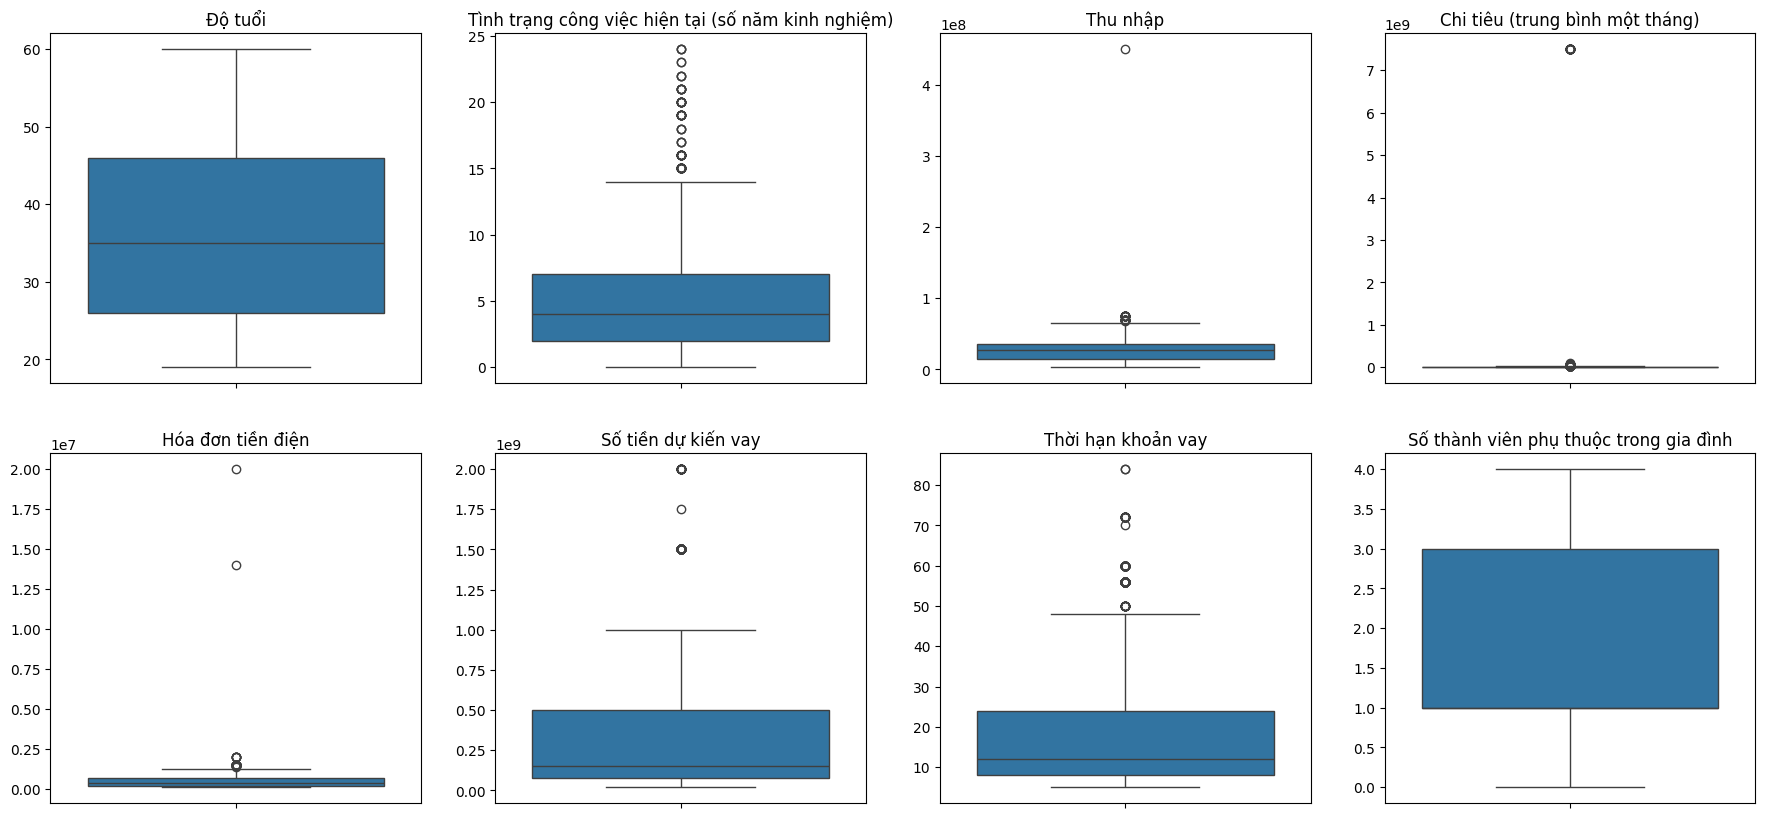

In [ ]:
# Outliers
plt.figure(figsize=(22,10))
for i in enumerate(numerical_features):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=data_1[i[1]])
    plt.title(i[1])
    plt.ylabel("")

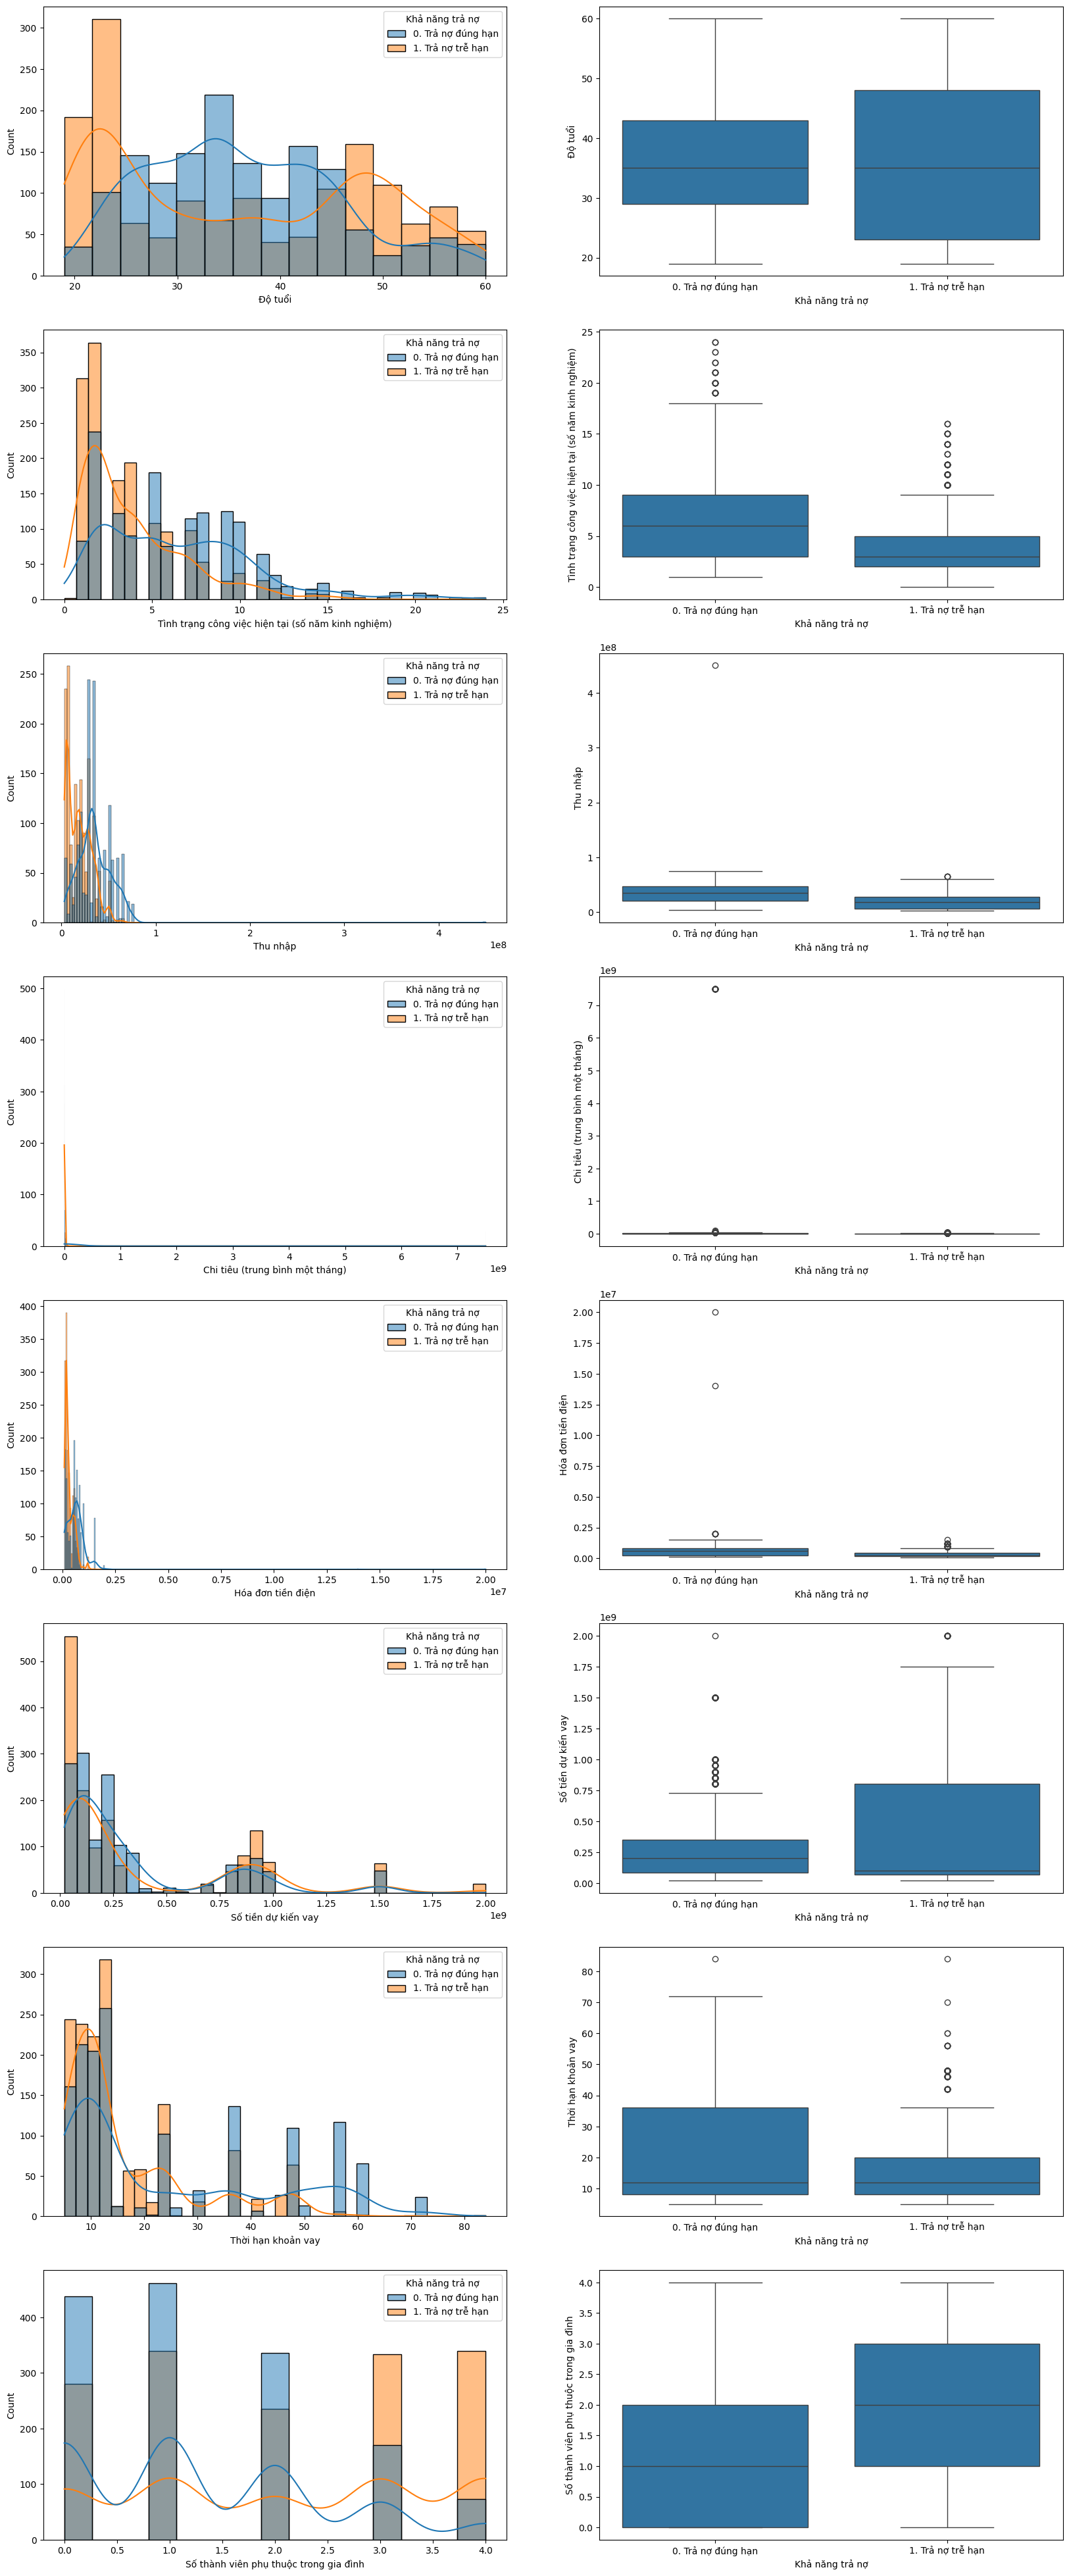

In [ ]:
fig, ax = plt.subplots(8, 2, **{"figsize": (20, 50)})
type_graph = ['histplot', 'boxplot']
for i, graph in enumerate(type_graph):
    for j, numerical in enumerate(numerical_features):
        if graph == 'histplot':
            sns.histplot(data=data_1, x=numerical, hue='Khả năng trả nợ', ax=ax[j][i], kde=True)
        else:
            sns.boxplot(data=data_1, x='Khả năng trả nợ', y=numerical, ax=ax[j][i])

### **b) Categorical Data Analysis**

In [ ]:
# Danh sách các biến phân loại:
def unique_classes(dataframe):
   # Returns a dataframe that contains the categorical values and their numbers.
   # dataframe: dataframe that gives the column names and their % of missing values

    output = pd.DataFrame()
    output.index = pd.DataFrame(dataframe.select_dtypes('object').apply(pd.Series.nunique)).index
    output['Number of categorical values'] = dataframe.select_dtypes('object').apply(pd.Series.nunique).values
    output['Categorical values'] = dataframe.select_dtypes('object').apply(pd.Series.unique).values
    pd.set_option('display.max_colwidth', None)
    return output

unique_classes(data_1)

Number of categorical values  \
Khả năng trả nợ                                     2   
Giới tính                                           2   
Tình trạng hôn nhân                                 4   
Tài sản thế chấp                                    2   
Tình trạng sở hữu nhà ở                             2   
Mục đích vay                                        6   
Chứng minh thu nhập                                 2   
Trình độ học vấn                                    4   

                                                                                                       Categorical values  
Khả năng trả nợ                                                                   [0. Trả nợ đúng hạn, 1. Trả nợ trễ hạn]  
Giới tính                                                                                                 [0. Nữ, 1. Nam]  
Tình trạng hôn nhân                                                 [1. Có gia đình, 2. Độc thân, 3. Ly hôn, 4. Góa, nan]  
Tài sản thế chấp                                                   [0. Có tài sản thế chấp, 1. Không có tài sản thế chấp]  
Tình trạng sở hữu nhà ở                                                        [0. Đã sở hữu nhà ở, 1. Chưa sở hữu nhà ở]  
Mục đích vay             [1. Tiêu dùng, 4. Mua xe, 6. Đầu tư chứng khoán, 2. Học tập, 3. Sản xuất kinh doanh, 5. Mua nhà]  
Chứng minh thu nhập                          [0. Có giấy tờ chứng minh thu nhập, 1. Không có giấy tờ chứng minh thu nhập]  
Trình độ học vấn                                                     [2. Thạc sĩ, 3. Đại học, 1. Tiến sĩ, 4. Cấp ba, nan]

In [ ]:
# Số biến có dữ liệu định tính (biến phân loại)
categorical_features = [x for x in data_1.columns if (x not in numerical_features and x != 'Khả năng trả nợ')]
print('Number of categorical features: ', len(categorical_features))

Number of categorical features:  7


In [ ]:
for col in categorical_features:
    data_1[col] = data_1[col].astype('object')

In [ ]:
# Thống kê mô tả biến phân loại
data_1[categorical_features].describe()

Giới tính Tình trạng hôn nhân              Tài sản thế chấp  \
count       3006                2992                          3006   
unique         2                   4                             2   
top       1. Nam      1. Có gia đình  1. Không có tài sản thế chấp   
freq        1589                1210                          1528   

       Tình trạng sở hữu nhà ở  Mục đích vay  \
count                     3006          3006   
unique                       2             6   
top       1. Chưa sở hữu nhà ở  1. Tiêu dùng   
freq                      1560          1026   

                      Chứng minh thu nhập Trình độ học vấn  
count                                3006             2985  
unique                                  2                4  
top     0. Có giấy tờ chứng minh thu nhập       3. Đại học  
freq                                 1574             1293

* “Giới tính”: There are 2 categories, (1) is male and (2) is female. The male gender accounts for the largest number with 1589 customers.
* “Tình trạng hôn nhân”: There are 4 categories presented in the category variables summary table above. The number of married customers in need of loans is the largest with 1210 customers.
* “Tài sản thế chấp”: The number of individual customers coming to borrow without collateral is the largest with 1528 customers.
* “Tình trạng sở hữu nhà ở”: Most of the individual customers (1560 customers) who come to borrow money do not own houses.
* “Mục đích vay”: There are 6 categories presented in the summary table above. Customers with consumer loan needs accounted for the largest number of customers, with 1026 people.
* “Chứng minh thu nhập”: There are 2 categories, (0) and (1) respectively yes and no. Most of the borrowers have full documentation to prove their source of income, this number is up to 1574 customers.
* “Trình độ học vấn”: There are 4 categories. Customers with university educations have a greater need for loans than the rest with 1293 customers.


**Categorical data visualization**

Text(0.5, 1.0, 'Giới tính của khách hàng')

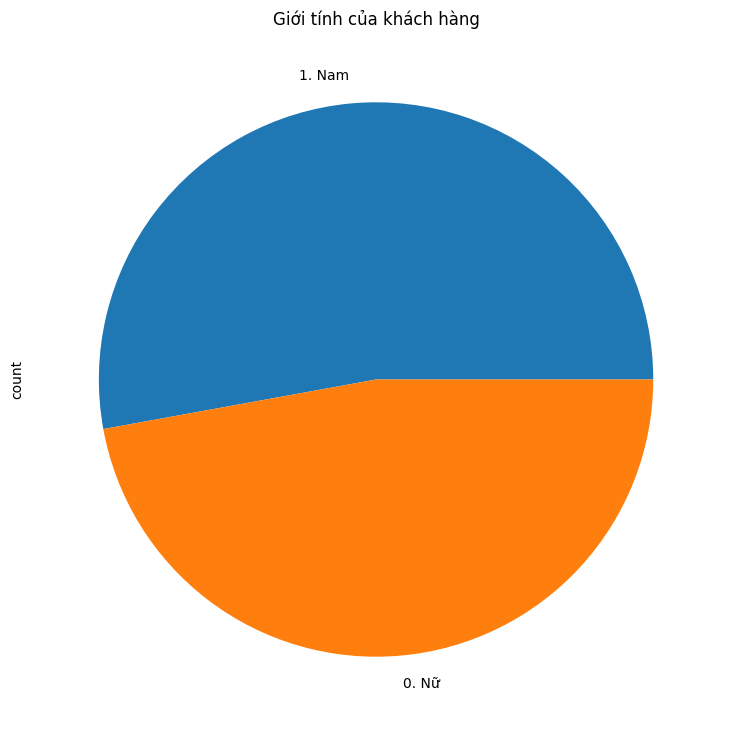

In [ ]:
# Categorical data visualization
plt.figure(figsize = (10, 9))
data_1['Giới tính'].value_counts().plot(kind='pie')
plt.title('Giới tính của khách hàng')

Tỷ lệ Nam vay vốn cao hơn Nữ, tuy nhiên chênh lệch không nhiều





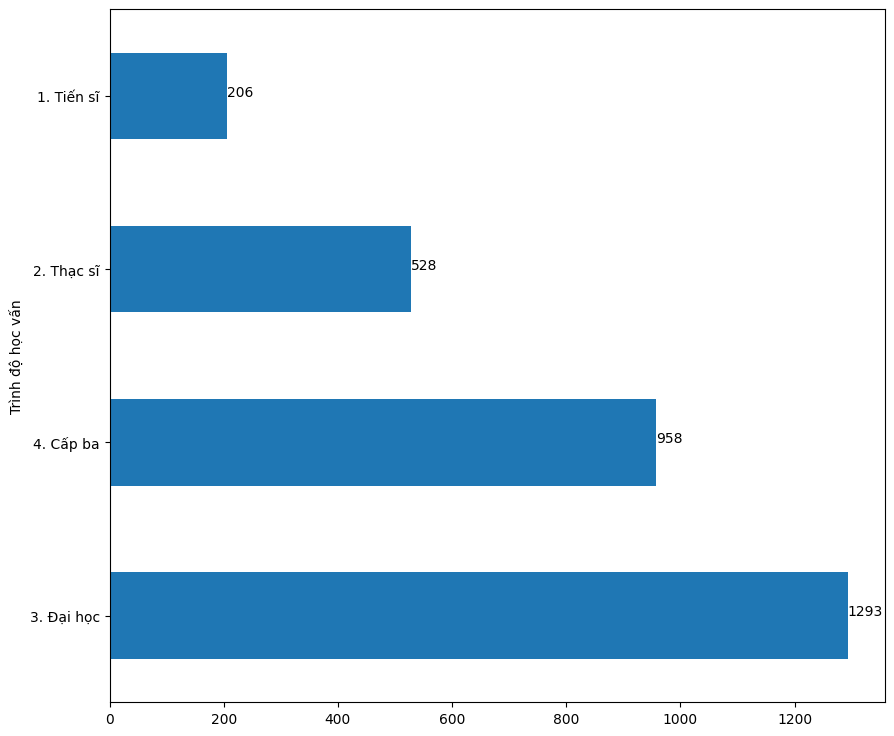

In [ ]:
plt.figure(figsize = (10, 9))
ax = data_1['Trình độ học vấn'].value_counts().plot(kind='barh')
for index, value in enumerate(data_1['Trình độ học vấn'].value_counts()):
    ax.text(value, index, str(value))

Tỷ lệ vay vốn đối với người có trình độ Đại học là cao nhất, kế đến là người có trình độ Cấp ba và những người có trình độ học vấn cao như Thạc sĩ, Tiến sĩ có tỷ lệ vay vốn tương đối thấp

<Axes: ylabel='count'>

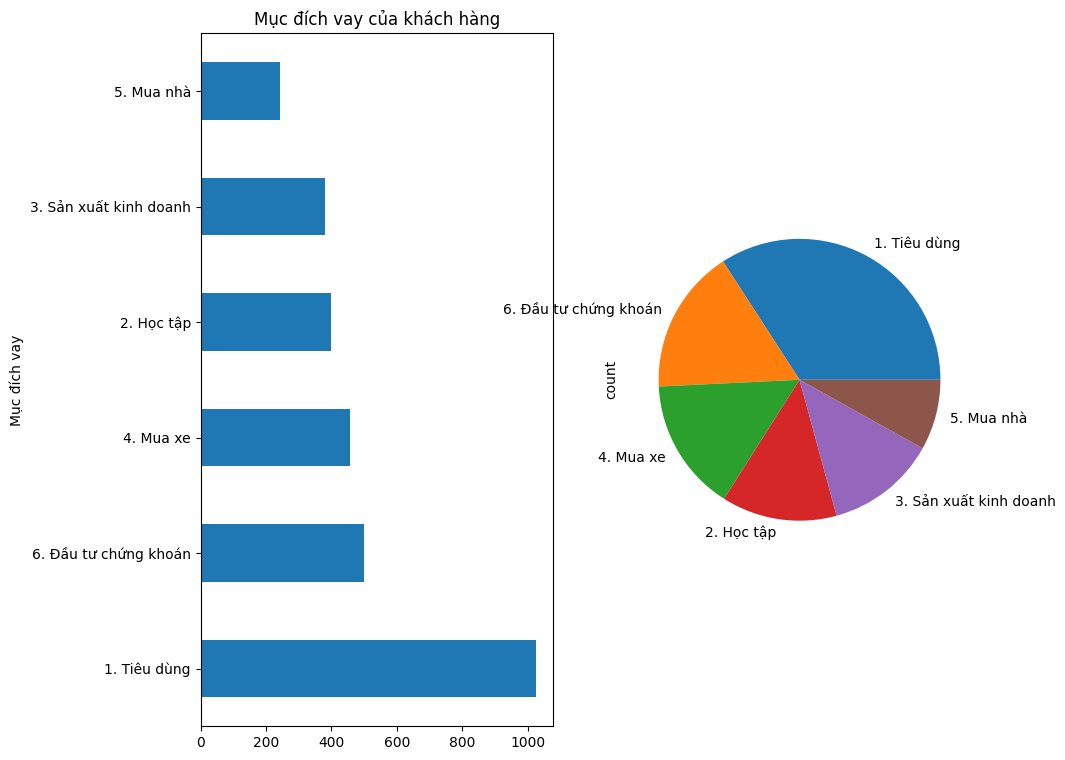

In [ ]:
plt.figure(figsize = (10, 9))

plt.subplot(1,2,1)
data_1['Mục đích vay'].value_counts().plot(kind='barh')
plt.title('Mục đích vay của khách hàng')
plt.subplot(1,2,2)
data_1['Mục đích vay'].value_counts().plot(kind='pie')

Đa số những người đi vay vốn với mục đích tiêu dùng, kế đến là đầu tư chứng khoán, mua xe, học tập, sản xuất kinh doanh. Những người vay vốn với mục đích mua nhà chiếm tỉ lệ thấp nhất.

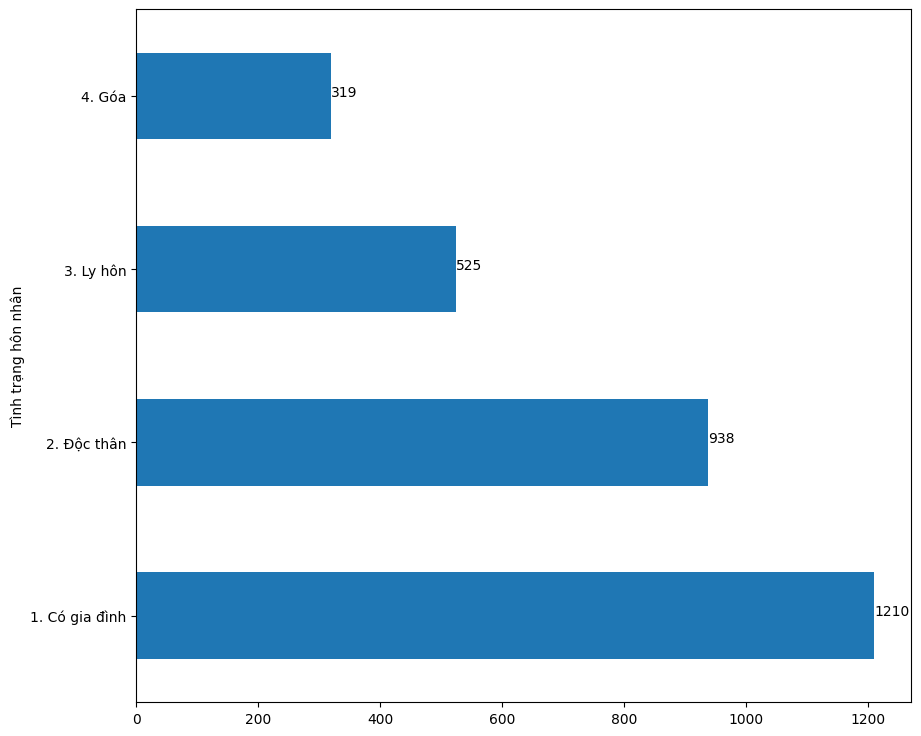

In [ ]:
plt.figure(figsize = (10, 9))

ax = data_1['Tình trạng hôn nhân'].value_counts().plot(kind='barh')
for index, value in enumerate(data_1['Tình trạng hôn nhân'].value_counts()):
    ax.text(value, index, str(value))

Tỷ lệ người có gia đình vay vốn cao hơn đáng kể so với những người chưa kết hôn, ly hôn hoặc góa.

Text(0.5, 1.0, 'Chứng minh thu nhập')

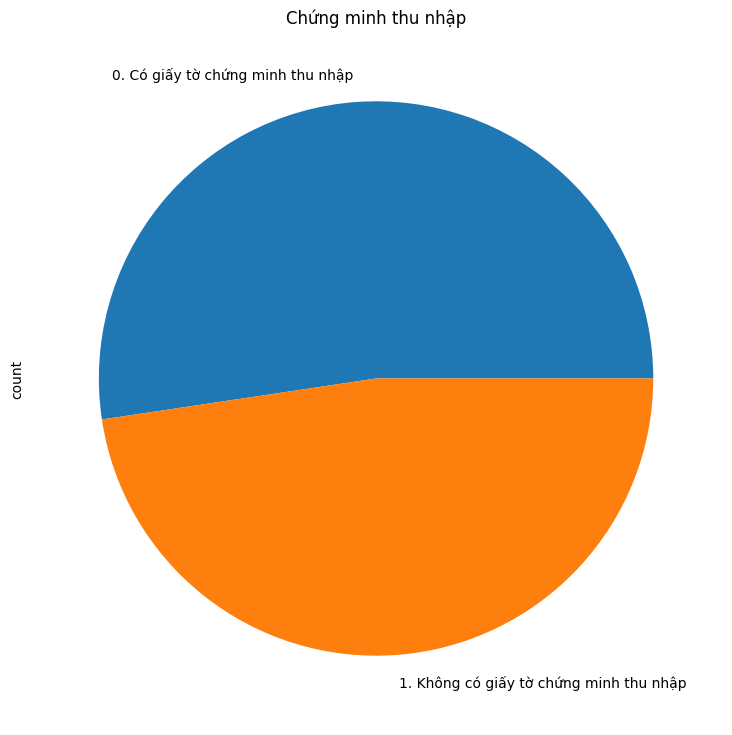

In [ ]:
plt.figure(figsize = (10, 9))
data_1['Chứng minh thu nhập'].value_counts().plot(kind='pie')
plt.title('Chứng minh thu nhập')

Tỷ lệ những người đi vay vốn có chứng minh thu nhập (nguồn thu nhập minh bạch) cao hơn những người không có giấy tờ chứng minh nguồn thu nhập, tuy nhiên mức độ chênh lệch không nhiều.

Text(0.5, 1.0, 'Tài sản thế chấp')

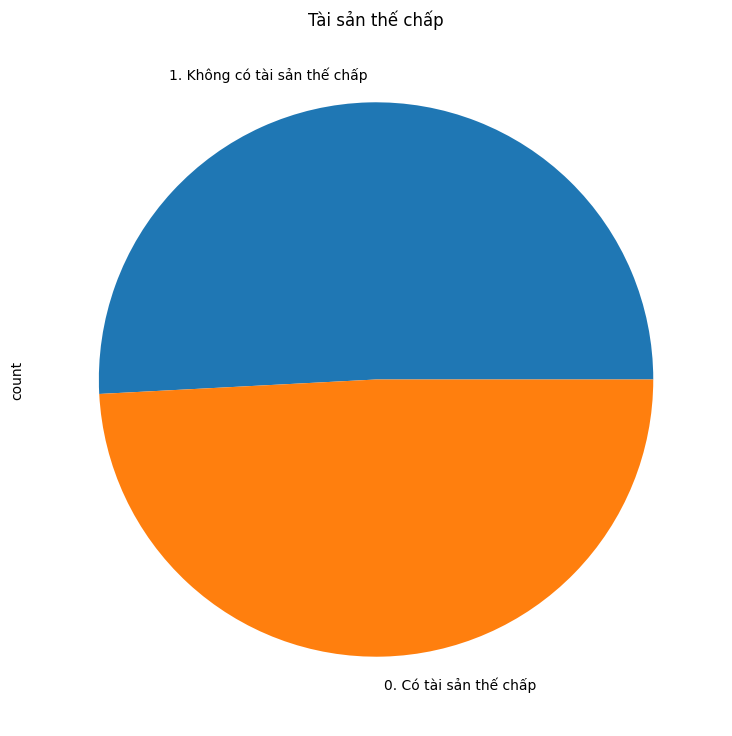

In [ ]:
plt.figure(figsize = (10, 9))
data_1['Tài sản thế chấp'].value_counts().plot(kind='pie')
plt.title('Tài sản thế chấp')

Không có sự chênh lệch nhiều giữa tỉ lệ người đi vay có tài sản thế chấp hoặc không.

Text(0.5, 1.0, 'Tình trạng sở hữu nhà ở')

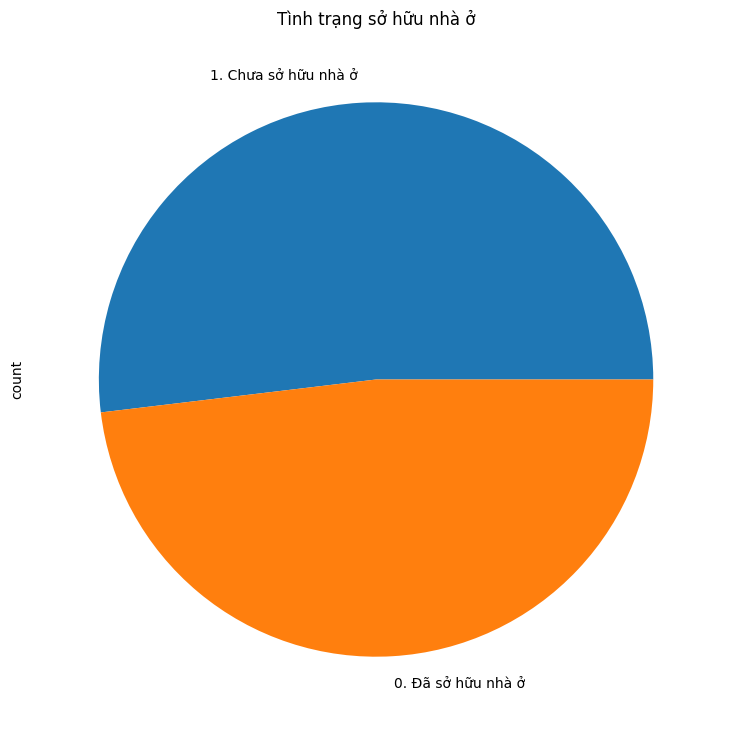

In [ ]:
plt.figure(figsize = (10, 9))
data_1['Tình trạng sở hữu nhà ở'].value_counts().plot(kind='pie')
plt.title('Tình trạng sở hữu nhà ở')

Tỷ lệ khách hàng chưa sở hữu nhà ở vay vốn cao hơn nhóm khách hàng đã sở hữu nhà ở, tuy nhiên chênh lệch không đáng kể.

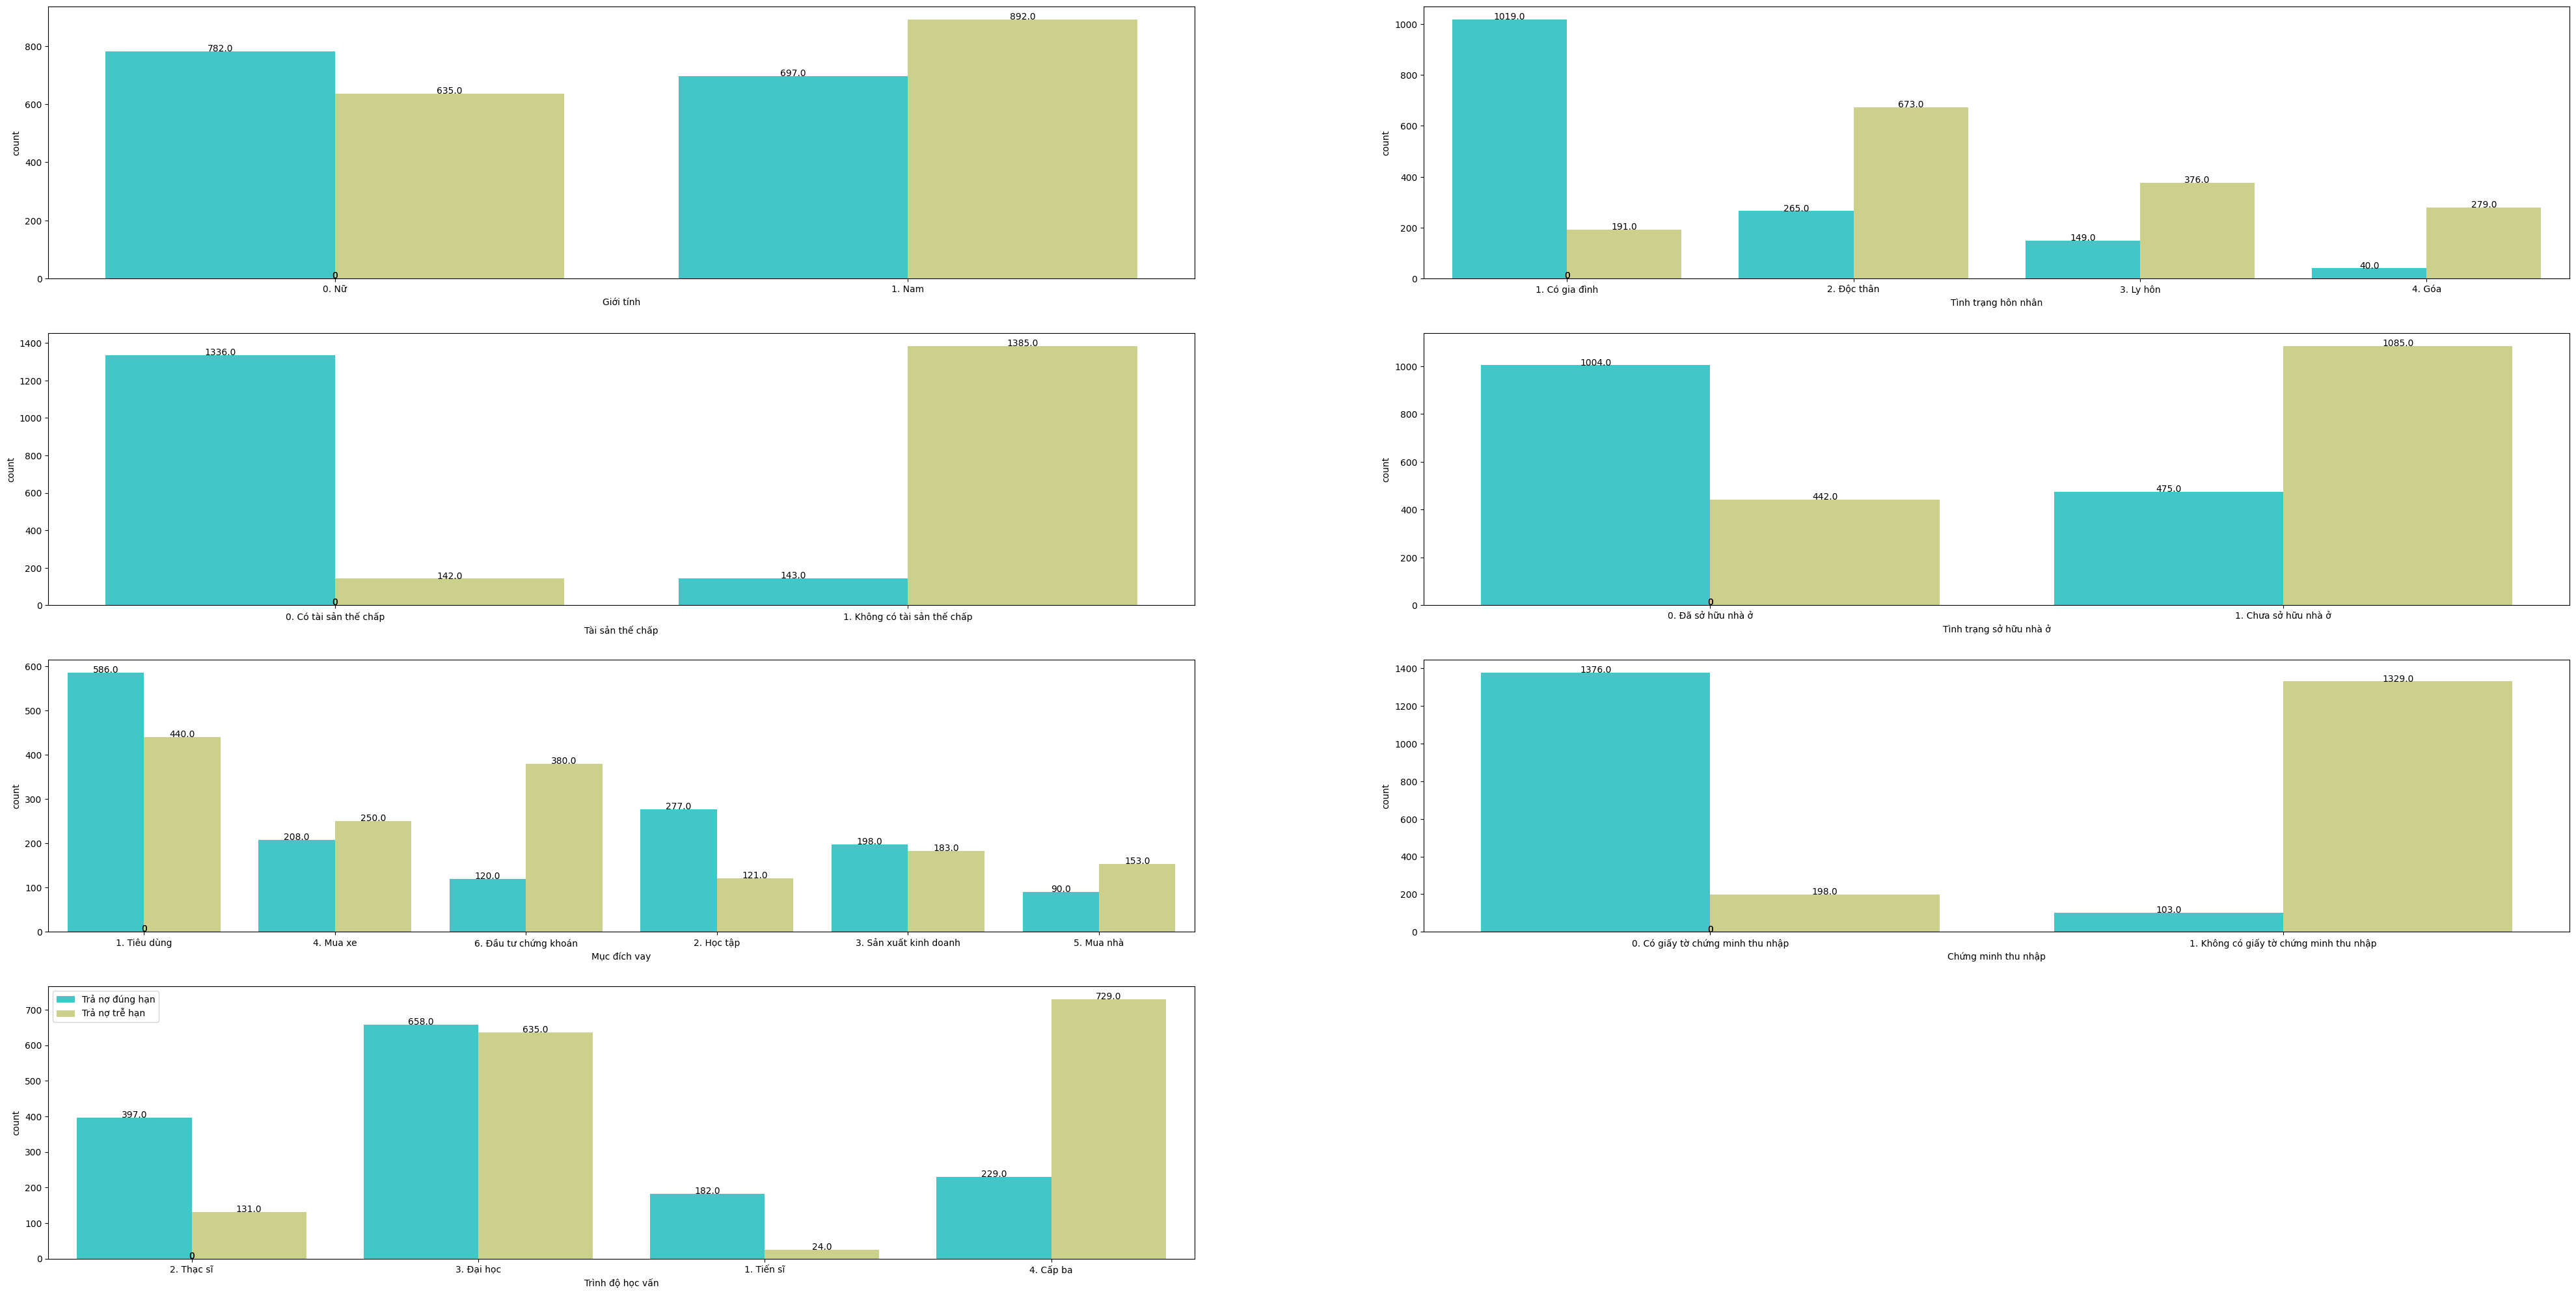

In [ ]:
# Categorical features
plt.figure(figsize=(50,25))
def count(categorical_features):
  x=1
  for i in categorical_features:
    plt.subplot(4,2,x)
    ax = sns.countplot(x=i,data=data_1, palette='rainbow',hue='Khả năng trả nợ')
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 10)
    plt.legend([],[], frameon=False)
    x+=1
  plt.legend(['Trả nợ đúng hạn', 'Trả nợ trễ hạn'])
  plt.savefig('Data visualization.png')


count(['Giới tính','Tình trạng hôn nhân','Tài sản thế chấp',
       'Tình trạng sở hữu nhà ở','Mục đích vay','Chứng minh thu nhập','Trình độ học vấn'])

* The rate of male borrowing is higher than female borrowing, but not much.
* The loan rate is highest for people with a university degree, followed by those with a high school degree and those with a high level of education such as masters and doctoral have a relatively low loan rate.
* Most people borrow capital for consumption purposes, followed by securities investment, car purchase, study, production and business. Borrowers for the purpose of buying a home accounted for the lowest percentage.
* The proportion of people with families taking out loans is significantly higher than those who are unmarried, divorced or widowed.
* The percentage of borrowers who have proof of income (transparent source of income) is higher than those who do not have proof of income, but the difference is not much.
* There is not much difference between the percentage of borrowers with or without collateral.
* The percentage of customers who do not own a house to borrow a loan is higher than the group of customers who already own a house, but the difference is not significant.


* Male customers have higher borrowing needs than female customers. Female borrowers are more likely to repay on time than male customers. Male customers have a higher rate of late payment compared to female customers.
* The group of customers with collateral had a significantly higher rate of on-time repayment than the group without collateral.
* Customers who borrow for the purpose of consumption will have a higher ability to repay both on time and late than the other purposes (because the number of consumer borrowers is significantly higher than other groups).
* Customers with a university education have the highest ability to repay their loans on time, and customers with a high school education tend to be the most late.
* The group of married customers has the highest rate of on-time repayment and the group of single customers with the highest possibility of late repayment.
* The group of customers who already own a house has a higher rate of on-time repayment than the group of customers who do not own a house, and the customers who do not own a house have a relatively high rate of late repayment.
* The group of customers who have full documents to prove their income source has a higher rate of on-time repayment than the group of customers who do not have documents to prove their income source.


### **c) Check if there is an imbalance in the classes present in the target variable**

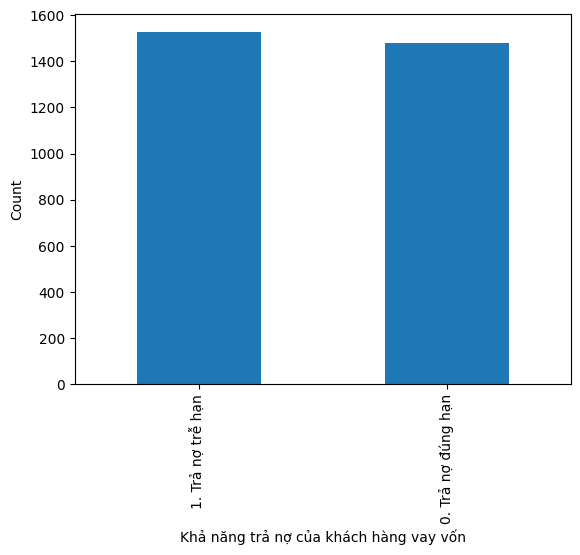

In [ ]:
# Check if there is an imbalance in the classes present in the target variable
features = []
for feature in data_1.columns:
    if feature != 'Khả năng trả nợ':
        features.append(feature)
X = data_1[features]
y = data_1['Khả năng trả nợ']
count = y.value_counts()
count.plot.bar()
plt.ylabel('Count')
plt.xlabel('Khả năng trả nợ của khách hàng vay vốn')
plt.show()

There is **NO** **imbalance** in the classes present in the target variable

In [ ]:
data_1['Khả năng trả nợ'].value_counts()

Khả năng trả nợ
1. Trả nợ trễ hạn     1527
0. Trả nợ đúng hạn    1479
Name: count, dtype: int64

### **d) Correlation**

In [ ]:
# Tương quan giữa các biến liên tục
corr = data_1[numerical_features].corr()
corr.style.background_gradient(cmap='coolwarm')

# **III. DATA PREPROCESSING**

## **1. Data Cleaning**

### **a) Handle missing values**

In [ ]:
# Kiểm tra các biến có tồn tại missing data hay không
data_1.isnull().any()

Khả năng trả nợ                                       False
Giới tính                                             False
Độ tuổi                                               False
Tình trạng hôn nhân                                    True
Tình trạng công việc hiện tại (số năm kinh nghiệm)     True
Thu nhập                                              False
Chi tiêu (trung bình một tháng)                       False
Hóa đơn tiền điện                                      True
Tài sản thế chấp                                      False
Tình trạng sở hữu nhà ở                               False
Số tiền dự kiến vay                                   False
Mục đích vay                                          False
Thời hạn khoản vay                                    False
Chứng minh thu nhập                                   False
Số thành viên phụ thuộc trong gia đình                False
Trình độ học vấn                                       True
dtype: bool

Total  Percentage
Trình độ học vấn                                       21    0.006986
Tình trạng công việc hiện tại (số năm kinh nghiệm)     16    0.005323
Tình trạng hôn nhân                                    14    0.004657
Hóa đơn tiền điện                                      14    0.004657
Khả năng trả nợ                                         0    0.000000

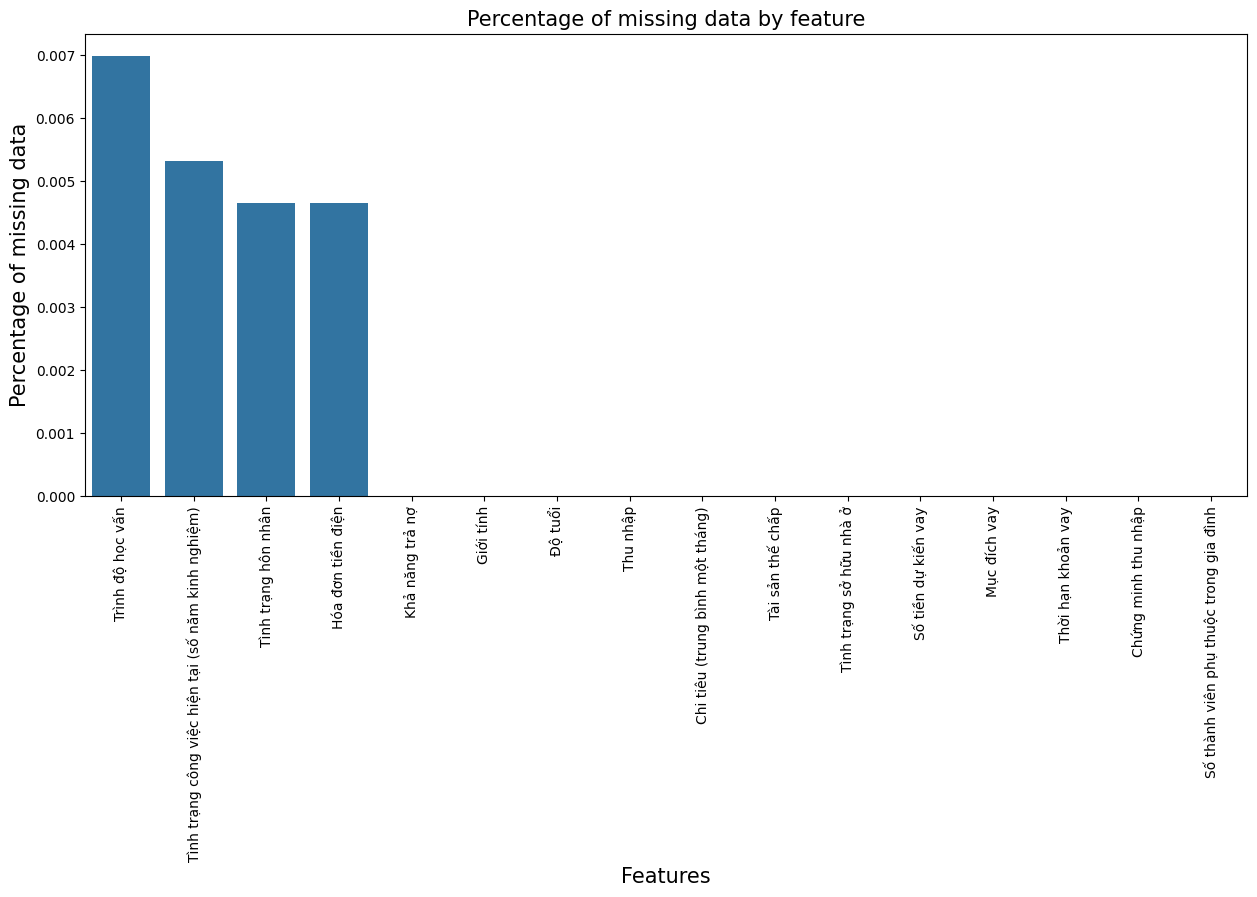

In [ ]:
# Trực quan hóa các biến có missing data
total = data_1.isnull().sum().sort_values(ascending=False)
percent = (data_1.isnull().sum()/data_1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='vertical')
sns.barplot(x=missing_data.index, y=missing_data['Percentage'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of missing data', fontsize=15)
plt.title('Percentage of missing data by feature', fontsize=15)
missing_data.head()

* There are 14 missing values in marriage status, 16 missing values in current job status (years of experience), 14 missing values in electricity bill and 21 missing values in education level. Then we need to fill them:
   *  With categorical variables 🡪 fill missing values with mode.
   *  With continuous variables 🡪 fill missing values with median.


In [ ]:
# Filling missing data
data_1['Trình độ học vấn'].fillna(data_1['Trình độ học vấn'].mode()[0], inplace=True)
data_1['Tình trạng hôn nhân'].fillna(data['Tình trạng hôn nhân'].mode()[0], inplace=True)
data_1['Hóa đơn tiền điện'].fillna(data_1['Hóa đơn tiền điện'].median(), inplace=True)
data_1['Tình trạng công việc hiện tại (số năm kinh nghiệm)'].fillna(data_1['Tình trạng công việc hiện tại (số năm kinh nghiệm)'].median(), inplace=True)

In [ ]:
# Kiểm tra lại còn tồn tại missing value hay không
data_1.isnull().sum()

Khả năng trả nợ                                       0
Giới tính                                             0
Độ tuổi                                               0
Tình trạng hôn nhân                                   0
Tình trạng công việc hiện tại (số năm kinh nghiệm)    0
Thu nhập                                              0
Chi tiêu (trung bình một tháng)                       0
Hóa đơn tiền điện                                     0
Tài sản thế chấp                                      0
Tình trạng sở hữu nhà ở                               0
Số tiền dự kiến vay                                   0
Mục đích vay                                          0
Thời hạn khoản vay                                    0
Chứng minh thu nhập                                   0
Số thành viên phụ thuộc trong gia đình                0
Trình độ học vấn                                      0
dtype: int64

### **b) Remove Duplicates**

In [ ]:
# Check số dòng bị trùng trong tập dữ liệu
data_1.duplicated().sum()

7

In [ ]:
# Xem các dữ liệu bị trùng lặp
duplicate = data_1[data_1.duplicated()]
print("Duplicate Rows:")
duplicate

Duplicate Rows:


Khả năng trả nợ Giới tính  Độ tuổi Tình trạng hôn nhân  \
2733  0. Trả nợ đúng hạn    1. Nam       48      1. Có gia đình   
3000  0. Trả nợ đúng hạn    1. Nam       55           3. Ly hôn   
3001  0. Trả nợ đúng hạn     0. Nữ       35      1. Có gia đình   
3002  0. Trả nợ đúng hạn     0. Nữ       55      1. Có gia đình   
3003  0. Trả nợ đúng hạn     0. Nữ       34      1. Có gia đình   
3004  0. Trả nợ đúng hạn     0. Nữ       58      1. Có gia đình   
3005  0. Trả nợ đúng hạn     0. Nữ       59      1. Có gia đình   

      Tình trạng công việc hiện tại (số năm kinh nghiệm)  Thu nhập  \
2733                                                 5.0  20000000   
3000                                                 4.0  42000000   
3001                                                 2.0  45000000   
3002                                                 7.0  55000000   
3003                                                 2.0  35000000   
3004                                                 6.0  50000000   
3005                                                 6.0  34000000   

      Chi tiêu (trung bình một tháng)  Hóa đơn tiền điện  \
2733                         16000000          1000000.0   
3000                         38000000           700000.0   
3001                         41000000          1000000.0   
3002                         51000000          1500000.0   
3003                         31000000          1000000.0   
3004                         46000000          1500000.0   
3005                         30000000           700000.0   

            Tài sản thế chấp Tình trạng sở hữu nhà ở  Số tiền dự kiến vay  \
2733  0. Có tài sản thế chấp      0. Đã sở hữu nhà ở            100000000   
3000  0. Có tài sản thế chấp      0. Đã sở hữu nhà ở            400000000   
3001  0. Có tài sản thế chấp    1. Chưa sở hữu nhà ở            200000000   
3002  0. Có tài sản thế chấp      0. Đã sở hữu nhà ở            200000000   
3003  0. Có tài sản thế chấp    1. Chưa sở hữu nhà ở            200000000   
3004  0. Có tài sản thế chấp      0. Đã sở hữu nhà ở            200000000   
3005  0. Có tài sản thế chấp      0. Đã sở hữu nhà ở            150000000   

                Mục đích vay  Thời hạn khoản vay  \
2733  3. Sản xuất kinh doanh                  12   
3000               4. Mua xe                  20   
3001              5. Mua nhà                  25   
3002  3. Sản xuất kinh doanh                  24   
3003              5. Mua nhà                  25   
3004              5. Mua nhà                  24   
3005              5. Mua nhà                  12   

                    Chứng minh thu nhập  \
2733  0. Có giấy tờ chứng minh thu nhập   
3000  0. Có giấy tờ chứng minh thu nhập   
3001  0. Có giấy tờ chứng minh thu nhập   
3002  0. Có giấy tờ chứng minh thu nhập   
3003  0. Có giấy tờ chứng minh thu nhập   
3004  0. Có giấy tờ chứng minh thu nhập   
3005  0. Có giấy tờ chứng minh thu nhập   

      Số thành viên phụ thuộc trong gia đình Trình độ học vấn  
2733                                       3       3. Đại học  
3000                                       0       3. Đại học  
3001                                       4       3. Đại học  
3002                                       4       3. Đại học  
3003                                       3        4. Cấp ba  
3004                                       1        4. Cấp ba  
3005                                       4       2. Thạc sĩ

In [ ]:
# Xóa các dòng bị trùng nhưng giữ lại dòng đầu tiên
data_2 = data_1.drop_duplicates(keep='first')

In [ ]:
# Kiểm tra lại thông tin của các features (số lượng, kiểu dữ liệu)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Khả năng trả nợ                                     2999 non-null   object 
 1   Giới tính                                           2999 non-null   object 
 2   Độ tuổi                                             2999 non-null   int64  
 3   Tình trạng hôn nhân                                 2999 non-null   object 
 4   Tình trạng công việc hiện tại (số năm kinh nghiệm)  2999 non-null   float64
 5   Thu nhập                                            2999 non-null   int64  
 6   Chi tiêu (trung bình một tháng)                     2999 non-null   int64  
 7   Hóa đơn tiền điện                                   2999 non-null   float64
 8   Tài sản thế chấp                                    2999 non-null   object 
 9   Tì

## **2. Data Transformation**

In [ ]:
# Đổi tên DataFrame
df = pd.DataFrame(data_2)

In [ ]:
# Convert data type
for i in df.columns:
    df[i] = df[i].apply(lambda x: str(x).split('.')[0])
    df[i] = df[i].apply(lambda x: int(x))
df.head(5)

Khả năng trả nợ  Giới tính  Độ tuổi  Tình trạng hôn nhân  \
0                0          0       37                    1   
1                0          0       41                    1   
2                0          1       33                    1   
3                0          1       36                    1   
4                0          1       35                    1   

   Tình trạng công việc hiện tại (số năm kinh nghiệm)  Thu nhập  \
0                                                   7  30000000   
1                                                   8  35000000   
2                                                   6  35000000   
3                                                   7  35000000   
4                                                   5  35000000   

   Chi tiêu (trung bình một tháng)  Hóa đơn tiền điện  Tài sản thế chấp  \
0                         15000000             600000                 0   
1                         19000000             650000                 0   
2                         20000000             600000                 0   
3                          4500000             750000                 0   
4                          4500000             650000                 0   

   Tình trạng sở hữu nhà ở  Số tiền dự kiến vay  Mục đích vay  \
0                        0            250000000             1   
1                        0            250000000             1   
2                        0            350000000             1   
3                        0            300000000             1   
4                        0            350000000             1   

   Thời hạn khoản vay  Chứng minh thu nhập  \
0                  12                    0   
1                  12                    0   
2                  12                    0   
3                  12                    0   
4                   8                    0   

   Số thành viên phụ thuộc trong gia đình  Trình độ học vấn  
0                                       1                 2  
1                                       2                 3  
2                                       2                 2  
3                                       2                 1  
4                                       3                 1

In [ ]:
# Đổi tên các biến sang không dấu
df=df.rename(columns = {'Khả năng trả nợ':'Kha nang tra no','Tình trạng công việc hiện tại (số năm kinh nghiệm)':'Tinh trang cong viec',
                        'Thu nhập':'Thu nhap','Tài sản thế chấp':'Tai san the chap',
                        'Giới tính':'Gioi tinh','Độ tuổi':'Do tuoi',
                        'Tình trạng hôn nhân':'Tinh trang hon nhan','Mục đích vay':'Muc dich vay',
                        'Số tiền dự kiến vay':'So tien vay','Thời hạn khoản vay':'Thoi han vay',
                        'Hóa đơn tiền điện':'Hoa don dien','Tình trạng sở hữu nhà ở':'Tinh trang so huu nha',
                        'Chi tiêu (trung bình một tháng)': 'Chi tieu', 'Chứng minh thu nhập':'Chung minh thu nhap',
                        'Số thành viên phụ thuộc trong gia đình': 'So nguoi phu thuoc', 'Trình độ học vấn':'Trinh do hoc van'
                       })
df.head(5)

Kha nang tra no  Gioi tinh  Do tuoi  Tinh trang hon nhan  \
0                0          0       37                    1   
1                0          0       41                    1   
2                0          1       33                    1   
3                0          1       36                    1   
4                0          1       35                    1   

   Tinh trang cong viec  Thu nhap  Chi tieu  Hoa don dien  Tai san the chap  \
0                     7  30000000  15000000        600000                 0   
1                     8  35000000  19000000        650000                 0   
2                     6  35000000  20000000        600000                 0   
3                     7  35000000   4500000        750000                 0   
4                     5  35000000   4500000        650000                 0   

   Tinh trang so huu nha  So tien vay  Muc dich vay  Thoi han vay  \
0                      0    250000000             1            12   
1                      0    250000000             1            12   
2                      0    350000000             1            12   
3                      0    300000000             1            12   
4                      0    350000000             1             8   

   Chung minh thu nhap  So nguoi phu thuoc  Trinh do hoc van  
0                    0                   1                 2  
1                    0                   2                 3  
2                    0                   2                 2  
3                    0                   2                 1  
4                    0                   3                 1

The dataset has been cleaned and converted to numeric data, ready to be used to evaluate machine learning models.


**CORRELATION BETWEEN VARIABLES**

In [ ]:
# Heatmap of correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

The correlation between all variables is within an acceptable level and reasonable in an economic sense.


In [ ]:
# Tương quan giữa các biến độc lập với biến mục tiêu
pd.DataFrame(df.corr().iloc[1:,0])

Kha nang tra no
Gioi tinh                     0.112178
Do tuoi                      -0.008602
Tinh trang hon nhan           0.507747
Tinh trang cong viec         -0.334659
Thu nhap                     -0.440103
Chi tieu                     -0.101646
Hoa don dien                 -0.274417
Tai san the chap              0.809871
Tinh trang so huu nha         0.389443
So tien vay                   0.047292
Muc dich vay                  0.251488
Thoi han vay                 -0.233467
Chung minh thu nhap           0.801039
So nguoi phu thuoc            0.284163
Trinh do hoc van              0.411693

The correlation between the independent variables and the target variable is consistent with the hypotheses given initially and with the expectation of a positive or negative impact on the target variable.


In [ ]:
correlation = df.corr().iloc[1:,0].values

In [ ]:
column_selected = [x for x in df.columns if (x != 'Kha nang tra no')]
column_selected

['Gioi tinh',
 'Do tuoi',
 'Tinh trang hon nhan',
 'Tinh trang cong viec',
 'Thu nhap',
 'Chi tieu',
 'Hoa don dien',
 'Tai san the chap',
 'Tinh trang so huu nha',
 'So tien vay',
 'Muc dich vay',
 'Thoi han vay',
 'Chung minh thu nhap',
 'So nguoi phu thuoc',
 'Trinh do hoc van']

In [ ]:
features_importances_corr = pd.DataFrame({'FeatureName': df[column_selected].columns[0:len(df[column_selected])-1], 'Pearson Correlation with target': correlation})
features_importances_corr.reindex(features_importances_corr['Pearson Correlation with target'].abs().sort_values(ascending=False).index)

FeatureName  Pearson Correlation with target
7        Tai san the chap                         0.809871
12    Chung minh thu nhap                         0.801039
2     Tinh trang hon nhan                         0.507747
4                Thu nhap                        -0.440103
14       Trinh do hoc van                         0.411693
8   Tinh trang so huu nha                         0.389443
3    Tinh trang cong viec                        -0.334659
13     So nguoi phu thuoc                         0.284163
6            Hoa don dien                        -0.274417
10           Muc dich vay                         0.251488
11           Thoi han vay                        -0.233467
0               Gioi tinh                         0.112178
5                Chi tieu                        -0.101646
9             So tien vay                         0.047292
1                 Do tuoi                        -0.008602

# **IV. EVALUATION AND SELECTION OF MODELS**

## **1. Feature Selection**

<Axes: ylabel='FeatureName'>

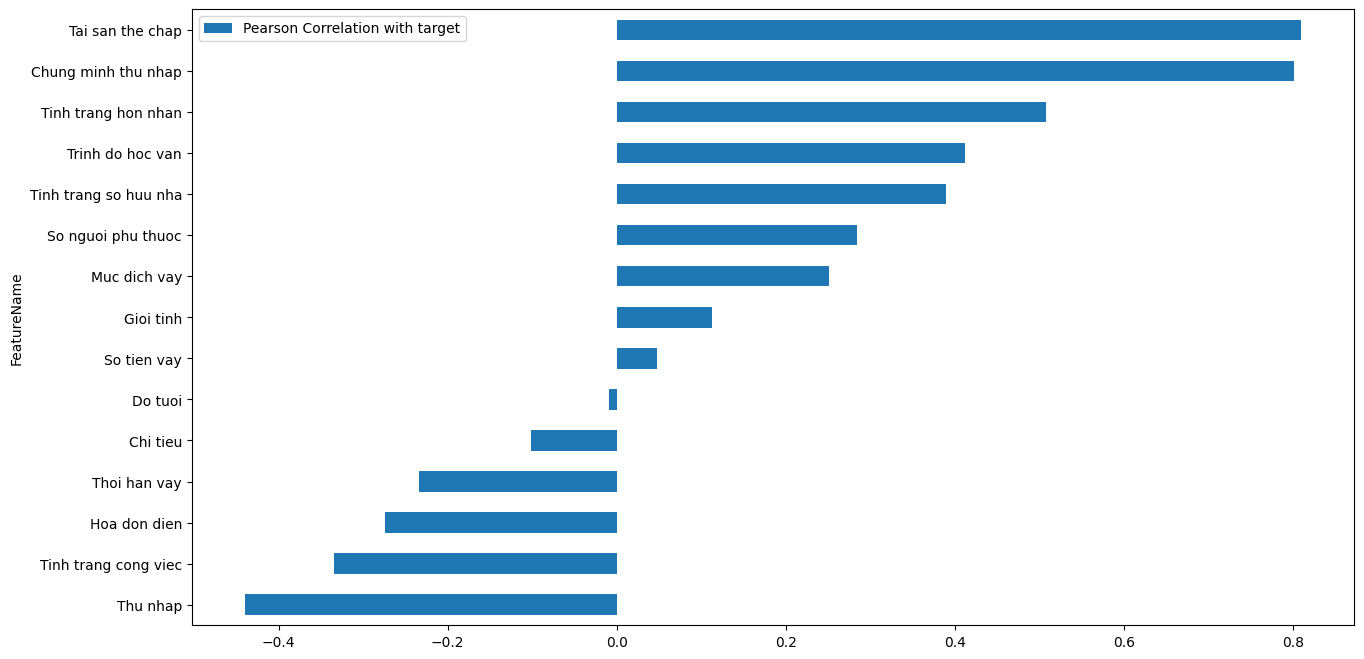

In [ ]:
features_importances_corr.sort_values(by = ['Pearson Correlation with target']).plot(figsize=(15,8), x="FeatureName", y = "Pearson Correlation with target", kind="barh")

* Variables that are negatively correlated with the target variable: “Do tuoi”, “Chi tieu”, “Thoi han vay”, “Hoa don dien”, “Tinh trang cong viec”, “Thu nhap”.
* Variables that are positively correlated with the target variable: “Tai san the chap”, “Chung minh thu nhap”, “Tinh trang hon nhan”, “Trinh do hoc van”, “Tinh trang so huu nha”, “So nguoi phu thuoc”, “Muc dich vay”, “Gioi tinh”, “So tien vay”.
* Among 15 independent variables, we will select 5 important variables with have a great influence on the target variable to run machine learning models to improve the quality of model results.
* We can see that the remaining variables have a quite weak correlation with the target variable; it is likely that these features, when included in the model, will not have much effect in predicting debt repayment capacity.


In [ ]:
from sklearn.metrics import roc_curve, auc
def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', color="r")
    plt.ylabel('True Positive Rate', color="g")
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

In [ ]:
target = ['Kha nang tra no']
features = ['Tai san the chap','Chung minh thu nhap','Tinh trang hon nhan','Thu nhap','Trinh do hoc van']

In [ ]:
X = df[features]
y = df[target]

## **2. Train Test Split**

In [ ]:
# train, test split
from sklearn.model_selection import train_test_split
n_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = n_state)
X_train.shape, X_test.shape

((2099, 5), (900, 5))

In [ ]:
print(np.count_nonzero(y_train == 1))
print(len(y_train) - np.count_nonzero(y_train == 1))

1066
1033


On the training set, the number of observations in class 0 = 1033 ~ 49% is not much different from the number of observations in class 1 = 1066 ~ 51%
🡪 There is no data imbalance on the training set.


## **3. Feature Scaling**

In [ ]:
# Using StandardScaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

# Scale train and test set
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## **4. Machine Learning Models**

Đưa các features quan trọng vào các mô hình phân loại:

### **a) LOGISTIC REGRESSION**

#### **Prediction**

In [ ]:
# Xây dựng mô hình Logistic regression
LR_classifier = LogisticRegression(multi_class='multinomial',random_state=n_state)

# Đưa giá trị X_train và y_train vào mô hình Logistic regression
LR_classifier.fit(X_train, y_train.values.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = LR_classifier.predict(X_train)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('Logistic Regression accuracy: ', round(accuracy_score(y_train, y_pred),4))

Confusion matrix:
     0     1
0  962    71
1   61  1005 

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1033
           1       0.93      0.94      0.94      1066

    accuracy                           0.94      2099
   macro avg       0.94      0.94      0.94      2099
weighted avg       0.94      0.94      0.94      2099

Logistic Regression accuracy:  0.9371


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

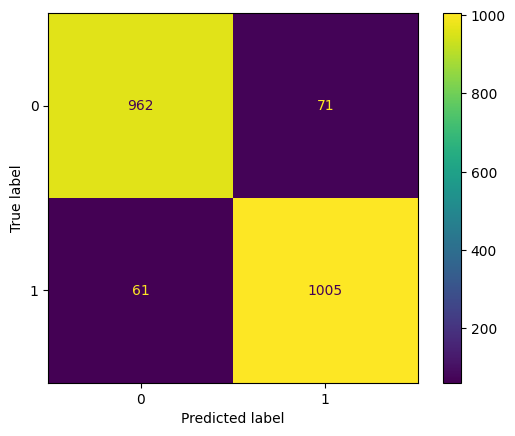

In [ ]:
# Trực quan ma trận bối rối
ConfusionMatrixDisplay.from_estimator(LR_classifier, X_train, y_train)
plt.show()

In [ ]:
# Xây dựng mô hình Logistic regression
LR_classifier = LogisticRegression(multi_class='multinomial',random_state=n_state)

# Đưa giá trị X_train và y_train vào mô hình Logistic regression
LR_classifier.fit(X_train, y_train.values.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = LR_classifier.predict(X_test)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Logistic Regression accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
     0    1
0  410   29
1   22  439 

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       439
           1       0.94      0.95      0.95       461

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

Logistic Regression accuracy:  0.9433


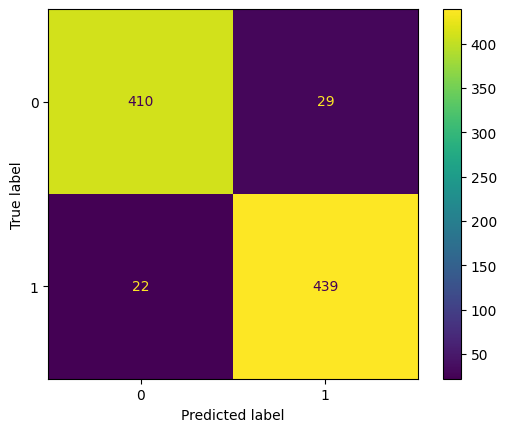

In [ ]:
ConfusionMatrixDisplay.from_estimator(LR_classifier, X_test, y_test)

#### **Feature Importance**

In [ ]:
importance_lr = LR_classifier.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'FeatureName': df.loc[:,features].columns, 'Logistic Regression Feature Importance': importance_lr})
# features_importances_lr.sort_values(by=['Logistic Regression Feature Importance'], ascending=False)
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

FeatureName  Logistic Regression Feature Importance
1  Chung minh thu nhap                                0.932668
0     Tai san the chap                                0.820317
2  Tinh trang hon nhan                                0.487112
3             Thu nhap                               -0.122048
4     Trinh do hoc van                                0.016964

<Axes: ylabel='FeatureName'>

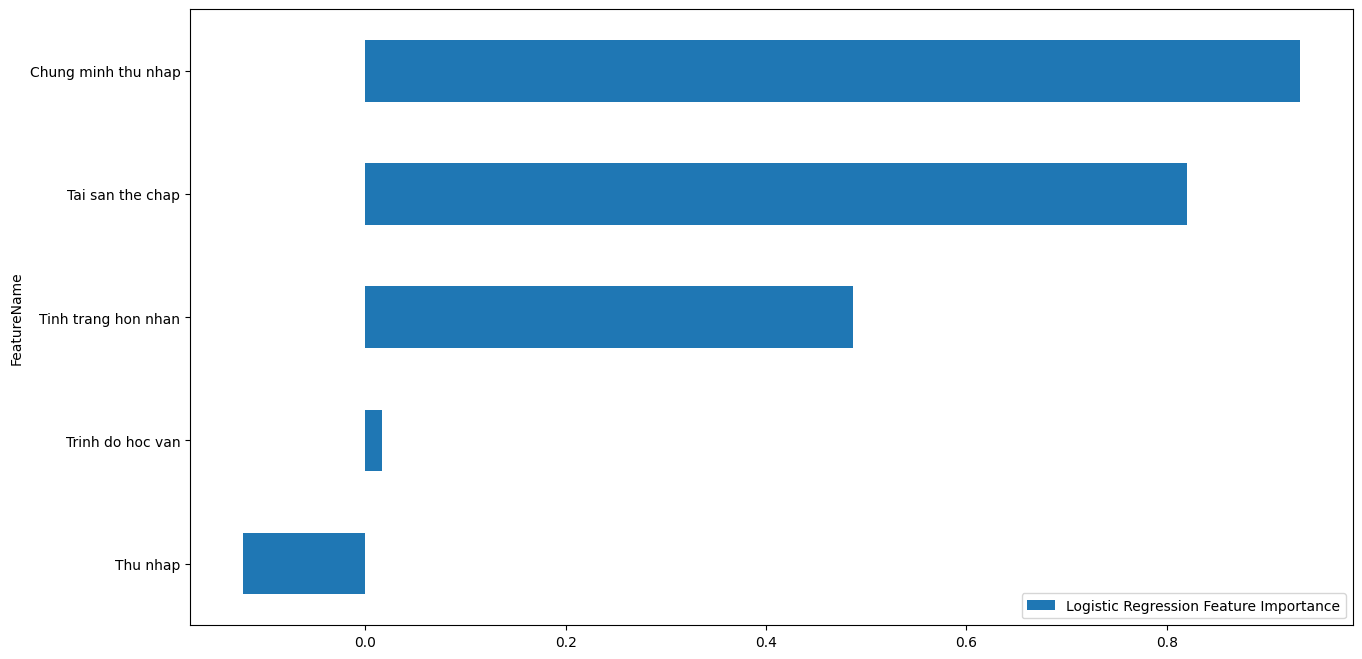

In [ ]:
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Logistic Regression Feature Importance"], kind="barh")

#### **ROC Curve**

<ipython-input-52-a448ee95e799>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-52-a448ee95e799>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


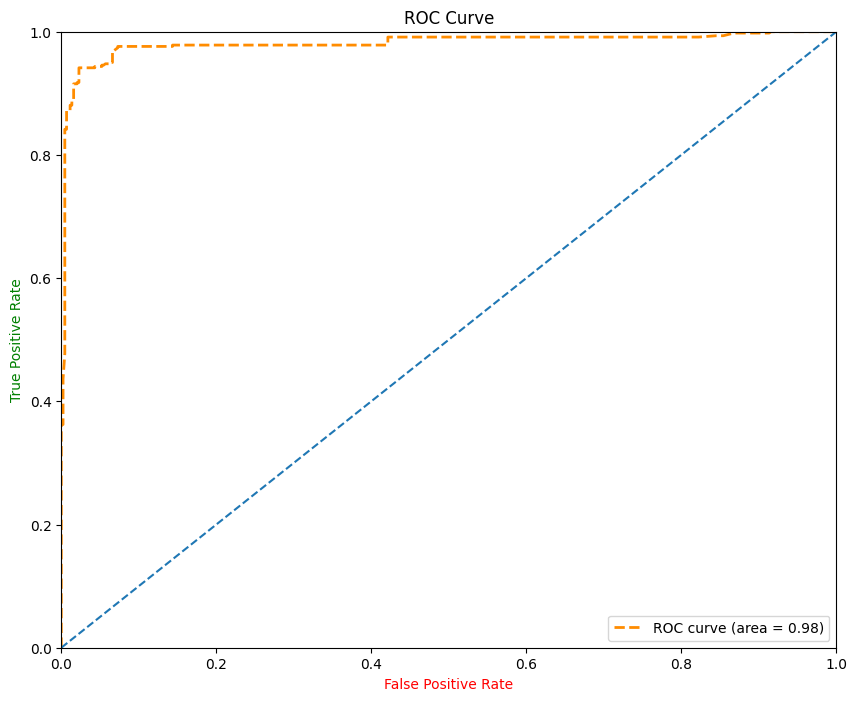

In [ ]:
y_pred_prob_test = LR_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

#### **Logistic Regression Results**

In [ ]:
import statsmodels.api as SM
model_1 = SM.Logit(y_train, X_train).fit()
print(model_1.summary())

Optimization terminated successfully.
         Current function value: 0.174795
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Kha nang tra no   No. Observations:                 2099
Model:                          Logit   Df Residuals:                     2094
Method:                           MLE   Df Model:                            4
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.7478
Time:                        03:59:39   Log-Likelihood:                -366.89
converged:                       True   LL-Null:                       -1454.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6458      0.108     15.241      0.000       1.434       1.857
x2             1.8558      0.

*   Logistic regression results show 3 variables: ‘Tai san the chap' (X1), ‘Chung minh thu nhap’ (X2), ‘Tinh trang hon nhan’ (X3) are statistically significant at 1% (p_value < α = 0.01) and 5% (p_value < α = 0.05) significance levels, respectively, and these variables have the positive effect on the target variable. Meanwhile, the variable ‘Thu nhap’ (X4) is statistically significant at 5% (p_value < α = 0.05) and has a negative effect on the repayment ability of customers. The variable that is not statistically significant at all levels of significance is ‘Trinh do hoc van’ (X5).
*   The Pseudo R-squared coefficient in the Logistic regression model is 0.7472 or 74.72% (the independent variables explain 74.72% of the dependent variable), this model is considered suitable in measuring repayment capacity of 3006 customers in the simulated dataset.


### **b. DECISION TREE**

#### **Prediction**

In [ ]:
# Xây dựng mô hình Decision Tree
DT_classifier = DecisionTreeClassifier()

# Đưa giá trị X_train và y_train vào mô hình Decision Tree
DT_classifier.fit(X_train, y_train.values.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = DT_classifier.predict(X_train)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('Decision Tree accuracy: ', accuracy_score(y_train, y_pred))

Confusion matrix:
      0     1
0  1020    13
1    36  1030 

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1033
           1       0.99      0.97      0.98      1066

    accuracy                           0.98      2099
   macro avg       0.98      0.98      0.98      2099
weighted avg       0.98      0.98      0.98      2099

Decision Tree accuracy:  0.9766555502620295


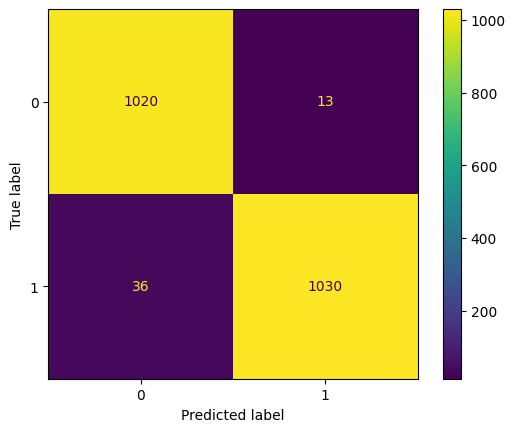

In [ ]:
ConfusionMatrixDisplay.from_estimator(DT_classifier, X_train, y_train)

In [ ]:
# Xây dựng mô hình Decision Tree
DT_classifier = DecisionTreeClassifier()

# Đưa giá trị X_train và y_train vào mô hình Decision Tree
DT_classifier.fit(X_train, y_train.values.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = DT_classifier.predict(X_test)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

Confusion matrix:
     0    1
0  429   10
1   53  408 

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       439
           1       0.98      0.89      0.93       461

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900

Decision Tree accuracy:  0.93


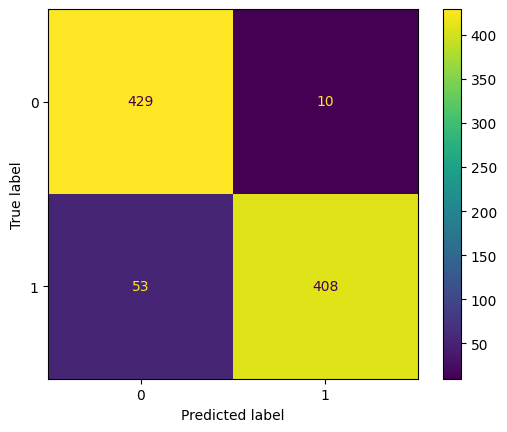

In [ ]:
ConfusionMatrixDisplay.from_estimator(DT_classifier, X_test, y_test)

#### **Feature Importance**

In [ ]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': df.loc[:,features].columns, 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

FeatureName  Decision Tree Feature Importance
0     Tai san the chap                          0.702779
1  Chung minh thu nhap                          0.117903
3             Thu nhap                          0.115934
2  Tinh trang hon nhan                          0.047293
4     Trinh do hoc van                          0.016090

<Axes: ylabel='FeatureName'>

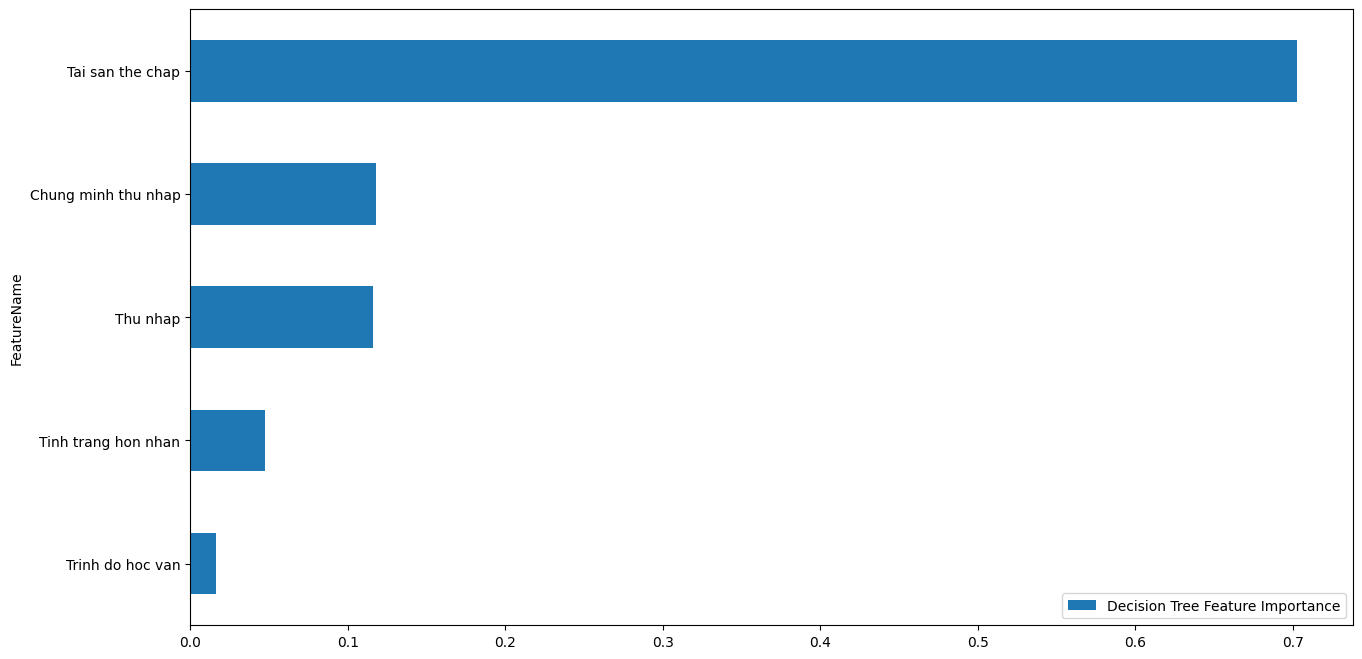

In [ ]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

#### **ROC Curve**

<ipython-input-52-a448ee95e799>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-52-a448ee95e799>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


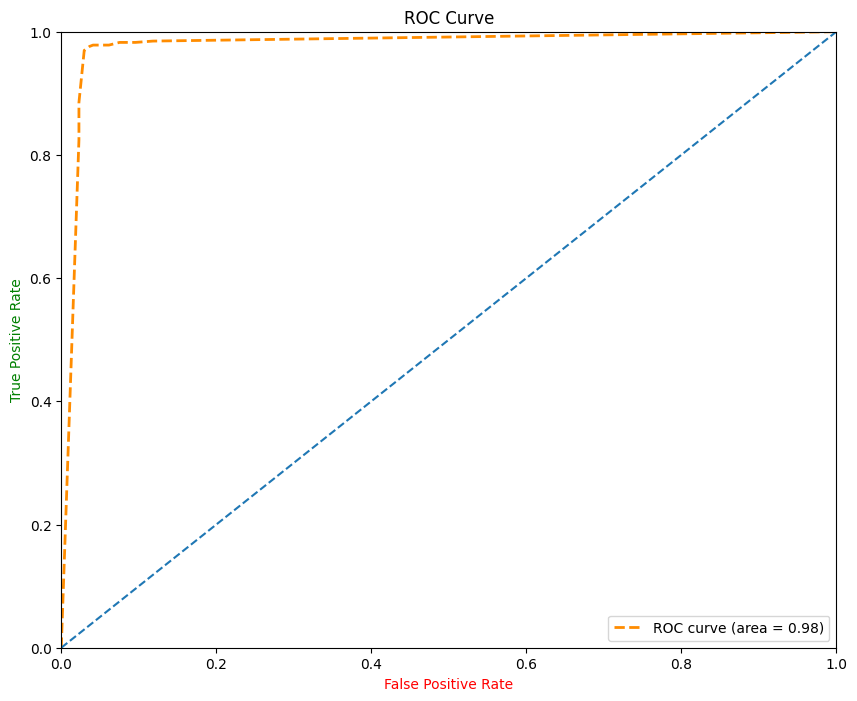

In [ ]:
y_pred_prob_test = DT_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

#### **Plot tree**

In [ ]:
X_plot_tree = df[features]

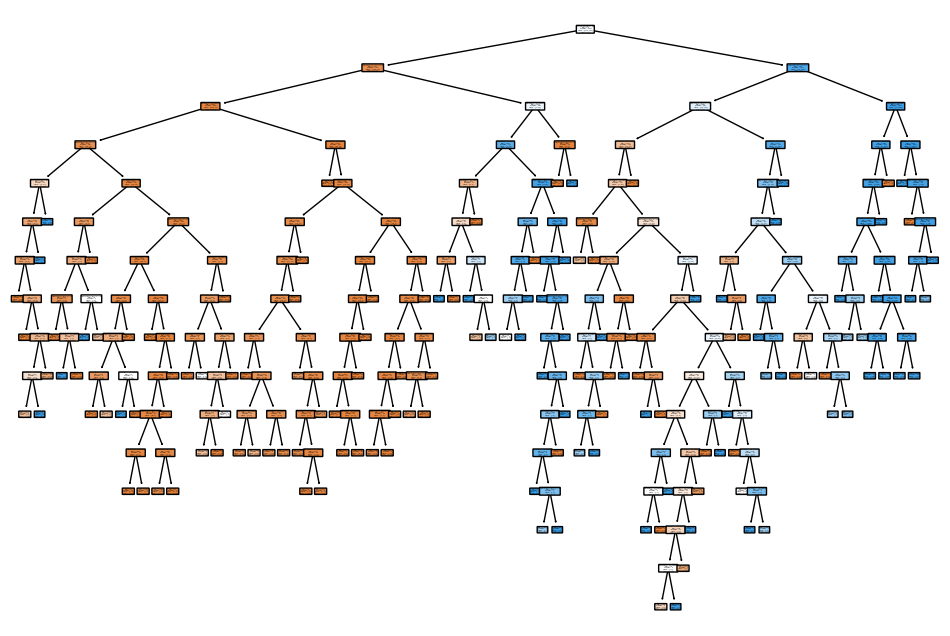

In [ ]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier()
clf.fit(X_plot_tree.values, y.values.ravel())

# Display the decision tree without special characters
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, rounded=True, feature_names=features, class_names=['On-time', 'Late'])
plt.show()

from io import StringIO
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus

dot_data = StringIO()

clf = DecisionTreeClassifier()
clf.fit(X_plot_tree.values, y.values.ravel())
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['On-time', 'Late'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
for i in range(len(X_plot_tree.columns)):
  print('X_%s'%i, end = ': ')
  print(X_plot_tree.columns[i])

X_0: Tai san the chap
X_1: Chung minh thu nhap
X_2: Tinh trang hon nhan
X_3: Thu nhap
X_4: Trinh do hoc van


Note:Class 0 is on-time payment and class 1 is late payment


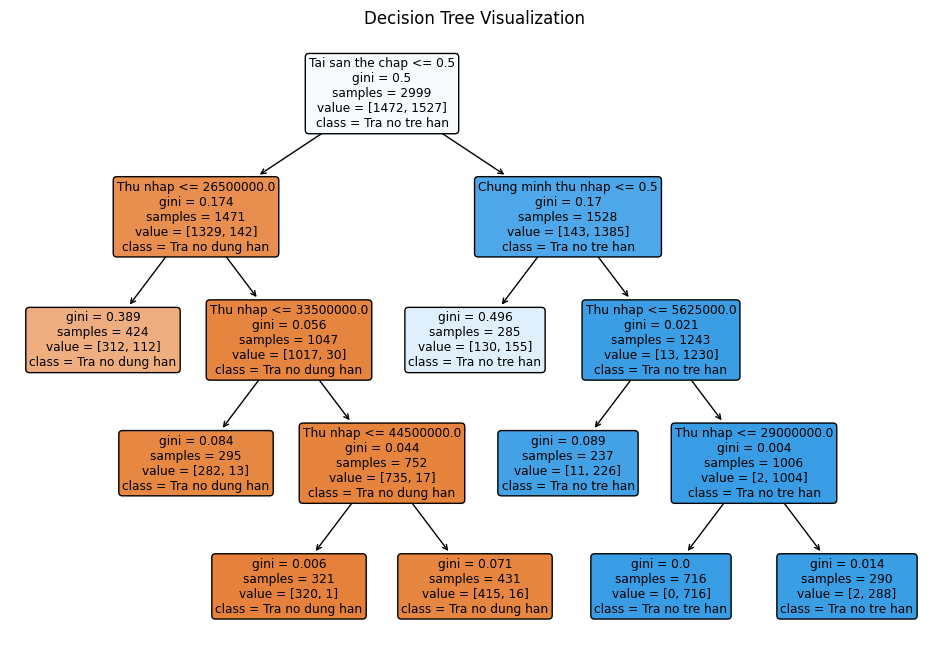

In [ ]:
# Dùng kĩ thuật gọt cây để trực quan hóa Decision Tree tốt hơn:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=200)
clf.fit(X_plot_tree.values, y.values.ravel())
print('Note:Class 0 is on-time payment and class 1 is late payment')
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, rounded=True, feature_names=features, class_names=['Tra no dung han', 'Tra no tre han'])
plt.title('Decision Tree Visualization')
plt.show()

From the decision tree diagram, we can derive the following lending rules for credit officers:
   *   (1) Customers who meet the two criteria of having collateral and have an income of more than 26.5 million VND, the credit officer can decide to lend them immediately.
   *   (2) For individual customers who do not have collateral, do not have any documents to prove a clear and transparent source of income, have an income from 5.625 million VND to 29 million VND, credit officers should refuse these loan applications immediately.
   *   (3) If a customer does not have collateral but has documents proving a clear and transparent source of income, credit officers should carefully consider other factors for this group of customers when deciding whether to lend or not.


Or trying this code:

dot_data = StringIO()
clf = DecisionTreeClassifier(max_depth=5 , min_samples_leaf=200)
clf.fit(X_plot_tree.values, y.values.ravel())
print('Note:Class 1 is late and class 0 is on-time payment')
export_graphviz(clf,
                out_file=dot_data,
                feature_names=features,
                class_names=['Tra no dung han','Tra no tre han'],
                filled=True,
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
# Print the tree in a simplified version.
from sklearn.tree import export_text
r = export_text(clf, feature_names=X.columns.tolist())
print(r)

|--- Tai san the chap <= 0.50
|   |--- Thu nhap <= 26500000.00
|   |   |--- class: 0
|   |--- Thu nhap >  26500000.00
|   |   |--- Thu nhap <= 33500000.00
|   |   |   |--- class: 0
|   |   |--- Thu nhap >  33500000.00
|   |   |   |--- Thu nhap <= 44500000.00
|   |   |   |   |--- class: 0
|   |   |   |--- Thu nhap >  44500000.00
|   |   |   |   |--- class: 0
|--- Tai san the chap >  0.50
|   |--- Chung minh thu nhap <= 0.50
|   |   |--- class: 1
|   |--- Chung minh thu nhap >  0.50
|   |   |--- Thu nhap <= 5625000.00
|   |   |   |--- class: 1
|   |   |--- Thu nhap >  5625000.00
|   |   |   |--- Thu nhap <= 29000000.00
|   |   |   |   |--- class: 1
|   |   |   |--- Thu nhap >  29000000.00
|   |   |   |   |--- class: 1



#### **Find optimal parameters using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Hyperparameters to be checked.
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
}
# GridSearchCV estimator.
gs_tree = GridSearchCV(DT_classifier, parameters, cv=10, n_jobs=-1, verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_tree.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             verbose=1)

In [ ]:
# Make predictions with the best parameters
gs_tree_pred=gs_tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
# Best parameters.
print("Best Decision tree Parameters: {}".format(gs_tree.best_params_))

# Cross validation accuracy for the best parameters.
print('Cross-validation accuracy: %0.3f' % gs_tree.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_tree.score(X_test,y_test)))

# Precision
print('Precision: %.3f' % precision_score(y_test, gs_tree_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, gs_tree_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, gs_tree_pred))

Best Decision tree Parameters: {'criterion': 'gini', 'max_depth': 8}
Cross-validation accuracy: 0.959
Accuracy: 0.931
Precision: 0.972
Recall: 0.892
F1 score: 0.930


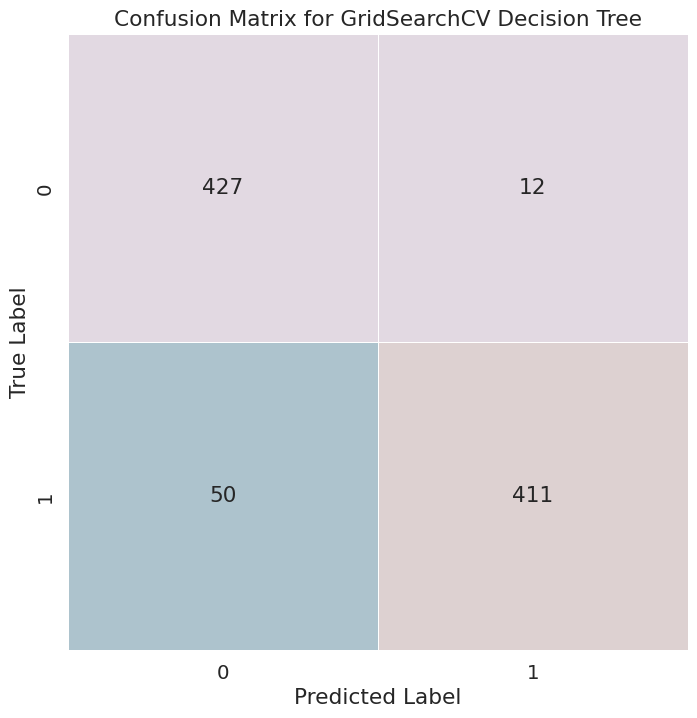

In [ ]:
gs_tr_matrix = confusion_matrix(y_test,gs_tree_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gs_tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Decision Tree');

Using GridSearchCV for the Decision Tree model, we found the best performing combination of hyperparameters. The prediction results on the test set after using the hyperparameters for the Decision Tree model, we see that the accuracy, precision, recall and f1-score indexes are all higher relative to the original, resulting in better prediction results of the model.


### **c. RANDOM FOREST**





In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### **Prediction**

In [ ]:
# Xây dựng mô hình Random Forest
RF_classifier = RandomForestClassifier()

# Đưa giá trị X_train và y_train vào mô hình Random Forest
RF_classifier.fit(X_train, y_train.values.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = RF_classifier.predict(X_train)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('Random Forest accuracy: ', accuracy_score(y_train, y_pred))

Confusion matrix:
      0     1
0  1013    20
1    29  1037 

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1033
           1       0.98      0.97      0.98      1066

    accuracy                           0.98      2099
   macro avg       0.98      0.98      0.98      2099
weighted avg       0.98      0.98      0.98      2099

Random Forest accuracy:  0.9766555502620295


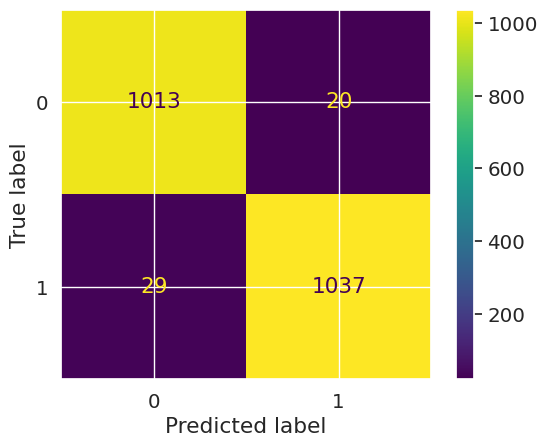

In [ ]:
ConfusionMatrixDisplay.from_estimator(RF_classifier, X_train, y_train)

In [ ]:
# Xây dựng mô hình Random Forest
RF_classifier = RandomForestClassifier()

# Đưa giá trị X_train và y_train vào mô hình Random Forest
RF_classifier.fit(X_train, y_train.values.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = RF_classifier.predict(X_test)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))

Confusion matrix:
     0    1
0  427   12
1   13  448 

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       439
           1       0.97      0.97      0.97       461

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900

Random Forest accuracy:  0.9722222222222222


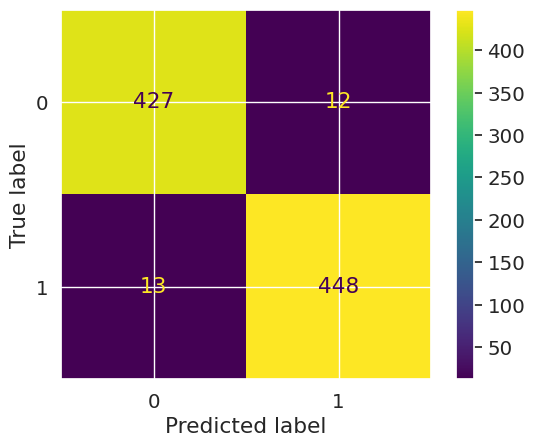

In [ ]:
ConfusionMatrixDisplay.from_estimator(RF_classifier, X_test, y_test)

#### **Feature Importance**

In [ ]:
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': df.loc[:,features].columns, 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

FeatureName  Random Forest Feature Importance
1  Chung minh thu nhap                          0.377233
0     Tai san the chap                          0.307958
3             Thu nhap                          0.146967
2  Tinh trang hon nhan                          0.142321
4     Trinh do hoc van                          0.025520

In [ ]:
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

<Axes: ylabel='FeatureName'>

#### **ROC Curve**

<ipython-input-52-a448ee95e799>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-52-a448ee95e799>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


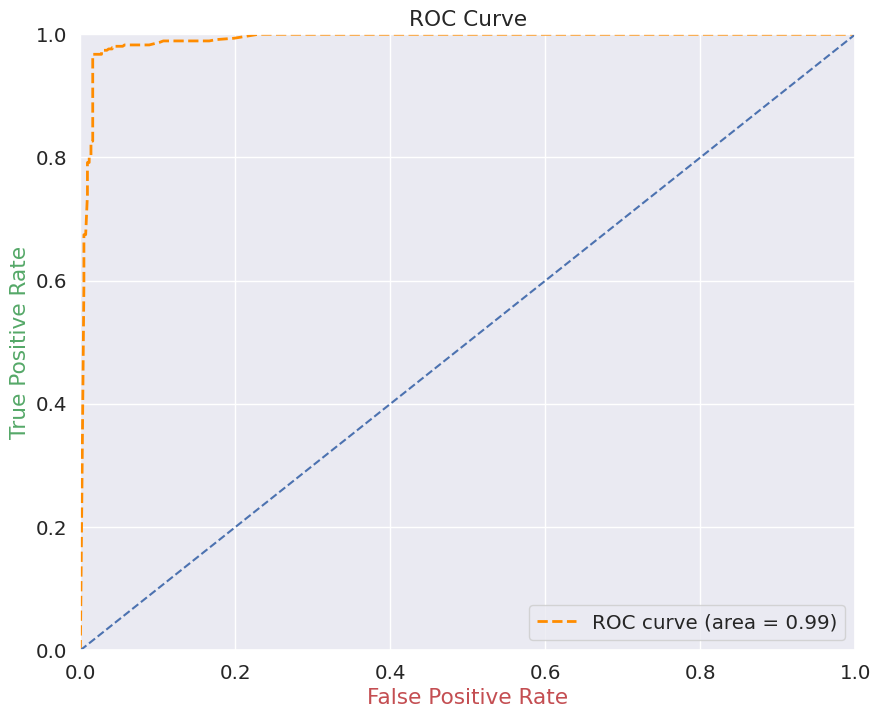

In [ ]:
y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

### **d. XGBOOST**

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

#### **Prediction**

In [ ]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.values.ravel())

y_pred = XGB_classifier.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_train, y_pred))

[[1015   18]
 [  32 1034]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1033
           1       0.98      0.97      0.98      1066

    accuracy                           0.98      2099
   macro avg       0.98      0.98      0.98      2099
weighted avg       0.98      0.98      0.98      2099

XGBoost accuracy:  0.9761791329204383


In [ ]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.values.ravel())

y_pred = XGB_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

[[439   0]
 [461   0]]
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       439
           1       0.00      0.00      0.00       461

    accuracy                           0.49       900
   macro avg       0.24      0.50      0.33       900
weighted avg       0.24      0.49      0.32       900

XGBoost accuracy:  0.48777777777777775


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Feature Importance**

In [ ]:
importance_xgb = XGB_classifier.feature_importances_
features_importances_xgb = pd.DataFrame({'FeatureName': df.loc[:,features].columns, 'XGBoost Feature Importance': importance_xgb})
features_importances_xgb.sort_values(by=['XGBoost Feature Importance'], ascending=False)

FeatureName  XGBoost Feature Importance
0     Tai san the chap                    0.711175
1  Chung minh thu nhap                    0.239828
2  Tinh trang hon nhan                    0.026359
3             Thu nhap                    0.016651
4     Trinh do hoc van                    0.005986

In [ ]:
features_importances_xgb.sort_values("XGBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["XGBoost Feature Importance"], kind="barh")

<Axes: ylabel='FeatureName'>

#### **ROC Curve**

<ipython-input-52-a448ee95e799>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-52-a448ee95e799>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


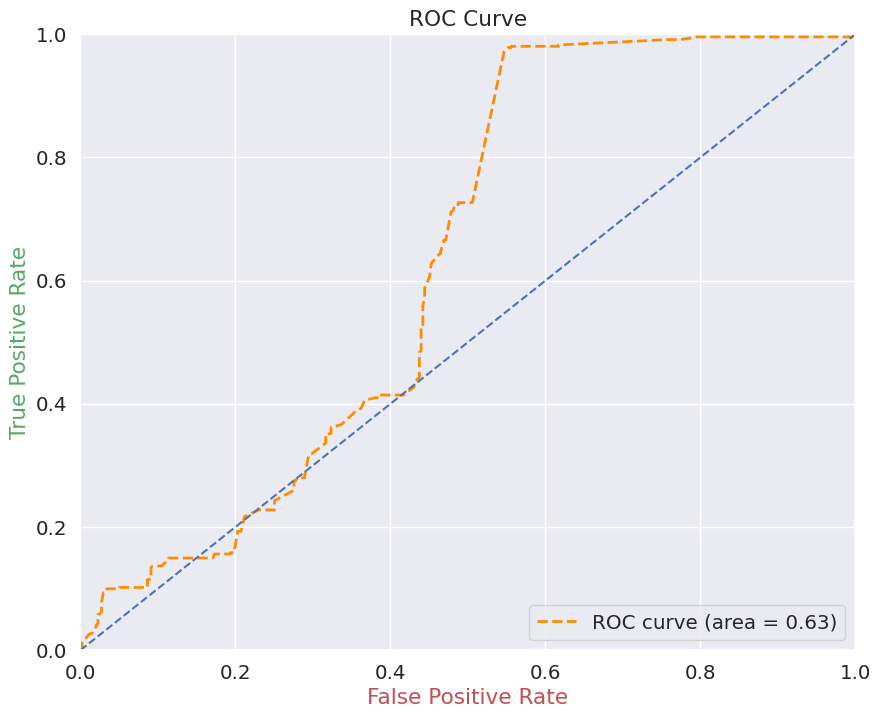

In [ ]:
y_pred_prob_test = XGB_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

#### **Plot tree**

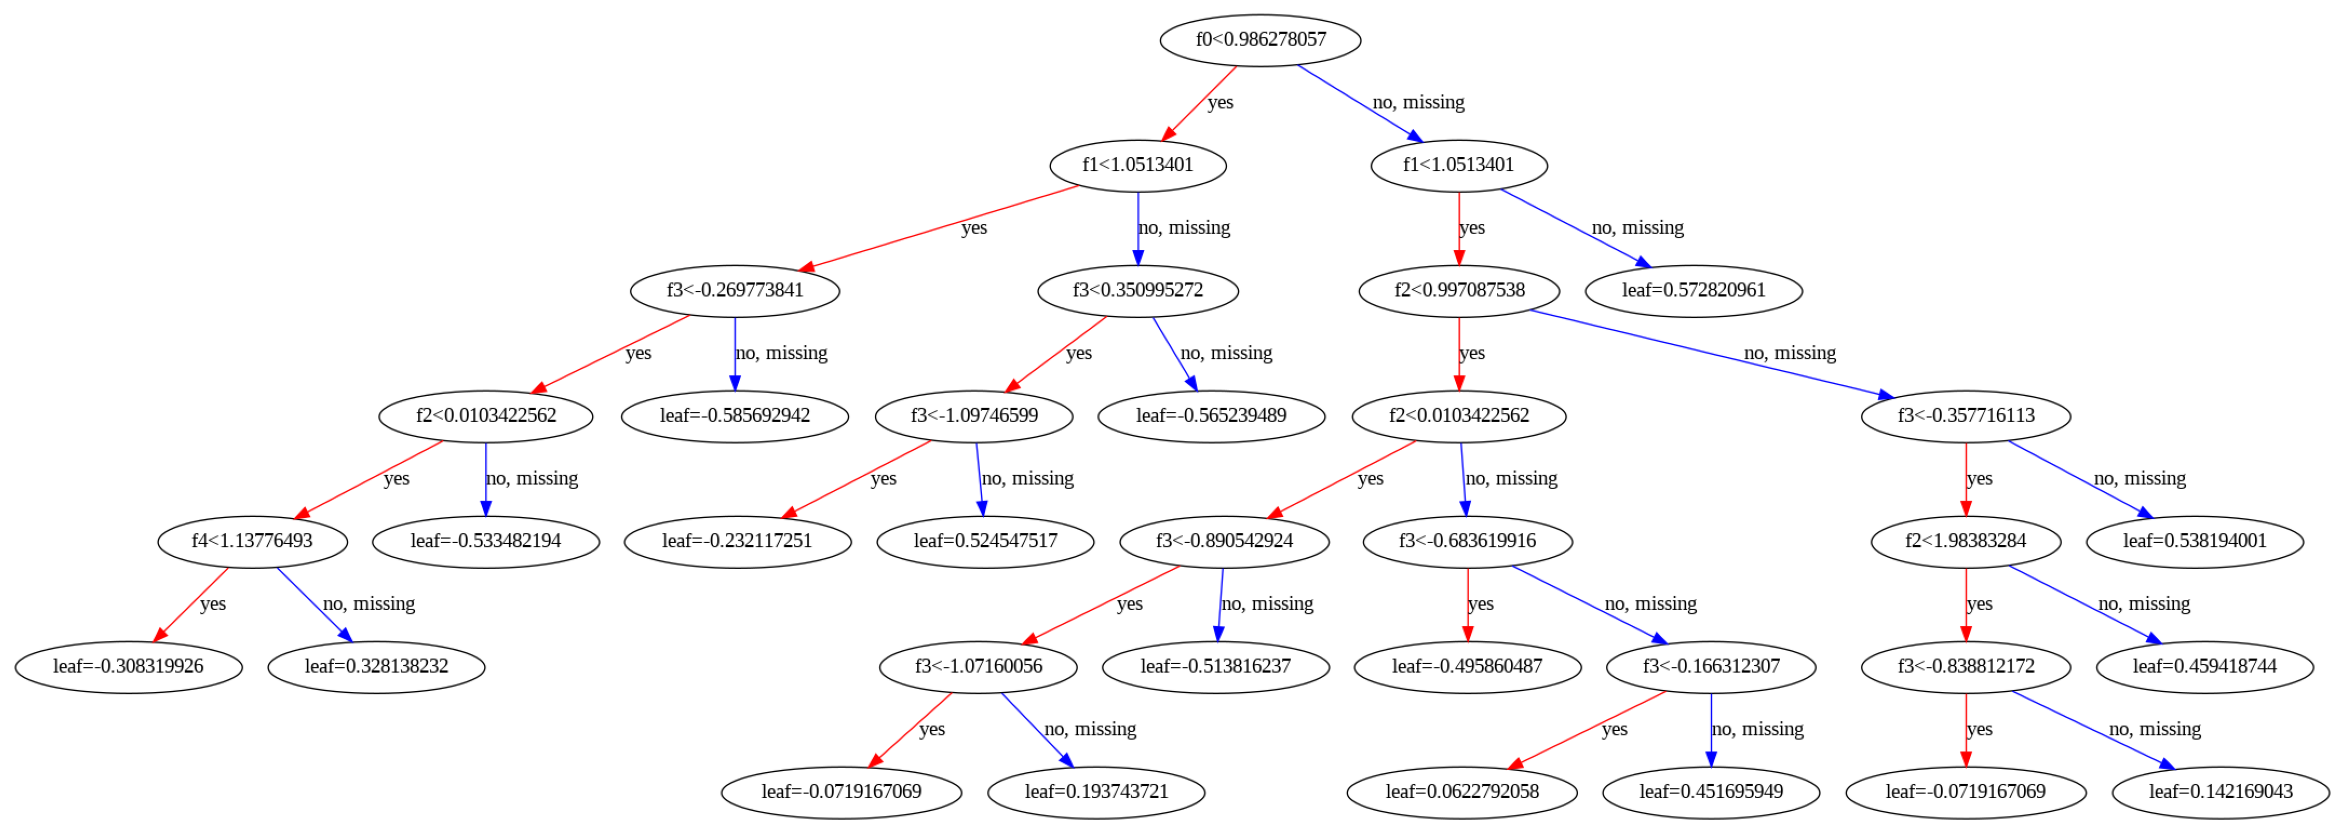

In [ ]:
# Plot the tree of XGBoost model
fig, ax = plt.subplots(figsize=(30, 140))
xgb.plot_tree(XGB_classifier, num_trees=0, ax=ax)
plt.show()

### **e. LIGHTGBM WITH STRATIFIED K-FOLD**

*Stratified KFold cross-validation is the same as KFold cross-validation; but in Stratified KFold cross-validation, it does stratified sampling instead of random sampling.*

#### **Prediction**

In [ ]:
# LightGBM Stratified KFold
import lightgbm as lgb
from sklearn.model_selection import KFold, StratifiedKFold

# Initialize the cross-validator
# Choosing StratifiedKFold
sf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
train_scores = []  # to store train evaluation scores
test_scores = []  # to store test evaluation scores

# Define the hyperparameters for LightGBM
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'random_state': 42
}
# Iterate over the cross-validation splits
for train_idx, test_idx in sf.split(X, y):
  # Split the data into training and test sets
    X_train_1, X_test_1 = X.iloc[train_idx], X.iloc[test_idx]
    y_train_1, y_test_1 = y.iloc[train_idx], y.iloc[test_idx]

    # Train the LightGBM model with selected hyperparameters
    LGBMClassifier = lgb.LGBMClassifier(**params)
    LGBMClassifier.fit(X_train_1, y_train_1)

    # Make predictions on the train data
    y_train_pred = LGBMClassifier.predict(X_train_1)

    # Evaluate the model on the train data
    train_accuracy = accuracy_score(y_train_1, y_train_pred)
    train_precision = precision_score(y_train_1, y_train_pred)
    train_recall = recall_score(y_train_1, y_train_pred)
    train_f1 = f1_score(y_train_1, y_train_pred)

    # Store the train evaluation scores
    train_scores.append({'Accuracy': train_accuracy, 'Precision': train_precision, 'Recall': train_recall, 'F1-score': train_f1})

    # Make predictions on the test data
    y_test_pred = LGBMClassifier.predict(X_test_1)

    # Evaluate the model on the test data
    test_accuracy = accuracy_score(y_test_1, y_test_pred)
    test_precision = precision_score(y_test_1, y_test_pred)
    test_recall = recall_score(y_test_1, y_test_pred)
    test_f1 = f1_score(y_test_1, y_test_pred)

    # Store the test evaluation scores
    test_scores.append({'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1-score': test_f1})

# Convert the evaluation scores to DataFrame
train_scores_df = pd.DataFrame(train_scores)
test_scores_df = pd.DataFrame(test_scores)

# Display the average evaluation scores on train data
avg_train_scores = train_scores_df.mean().to_frame(name='Train')
print("Average Train Evaluation Scores:")
print(avg_train_scores)

# Display the average evaluation scores on test data
avg_test_scores = test_scores_df.mean().to_frame(name='Test')
print("Average Test Evaluation Scores:")
print(avg_test_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1375, number of negative: 1324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509448 -> initscore=0.037796
[LightGBM] [Info] Start training from score 0.037796


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1375, number of negative: 1324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509448 -> initscore=0.037796
[LightGBM] [Info] Start training from score 0.037796


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1374, number of negative: 1325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509077 -> initscore=0.036314
[LightGBM] [Info] Start training from score 0.036314


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1374, number of negative: 1325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 68
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509077 -> initscore=0.036314
[LightGBM] [Info] Start training from score 0.036314


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1374, number of negative: 1325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509077 -> initscore=0.036314
[LightGBM] [Info] Start training from score 0.036314
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1374, number of negative: 1325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tr

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1374, number of negative: 1325
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509077 -> initscore=0.036314
[LightGBM] [Info] Start training from score 0.036314
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1374, number of negative: 1325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1374, number of negative: 1325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509077 -> initscore=0.036314
[LightGBM] [Info] Start training from score 0.036314
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1375, number of negative: 1325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tr

In [ ]:
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test_1,y_test_pred)),'\n')

Confusion matrix:
     0    1
0  145    2
1    9  143 



#### **Feature Importance**

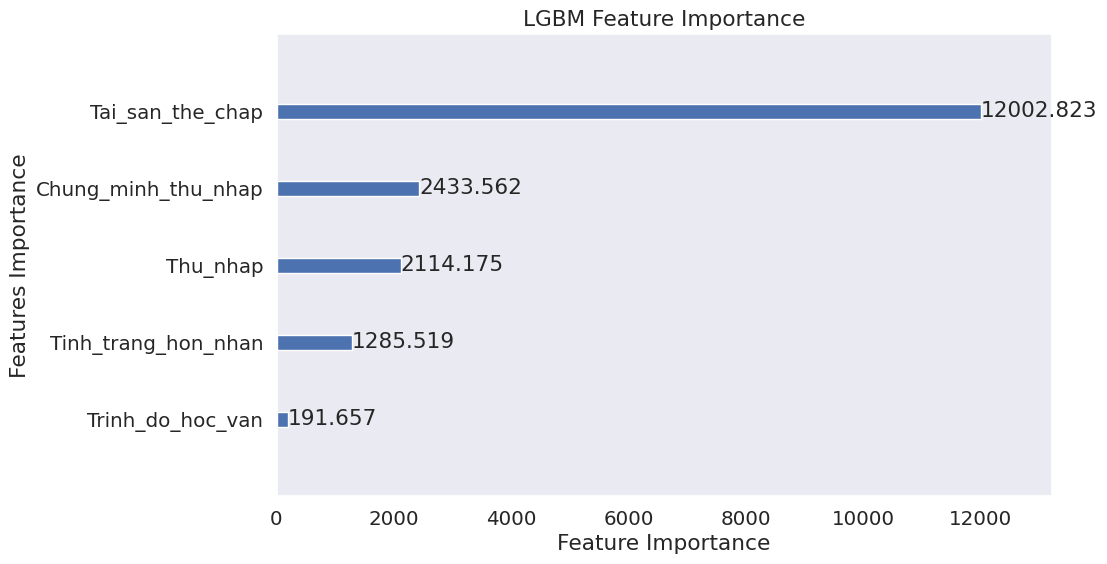

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
lgb.plot_importance(LGBMClassifier, ax=ax, importance_type='gain', grid=False)
plt.xlabel('Feature Importance')
plt.ylabel('Features Importance')
plt.title('LGBM Feature Importance')
plt.show()

#### **ROC Curve**

In [ ]:
y_pred_prob_test = LGBMClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
_plot_roc_curve(fpr, tpr, thres, roc_auc)

<ipython-input-52-a448ee95e799>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-52-a448ee95e799>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


#### **Plot tree**

<Axes: >

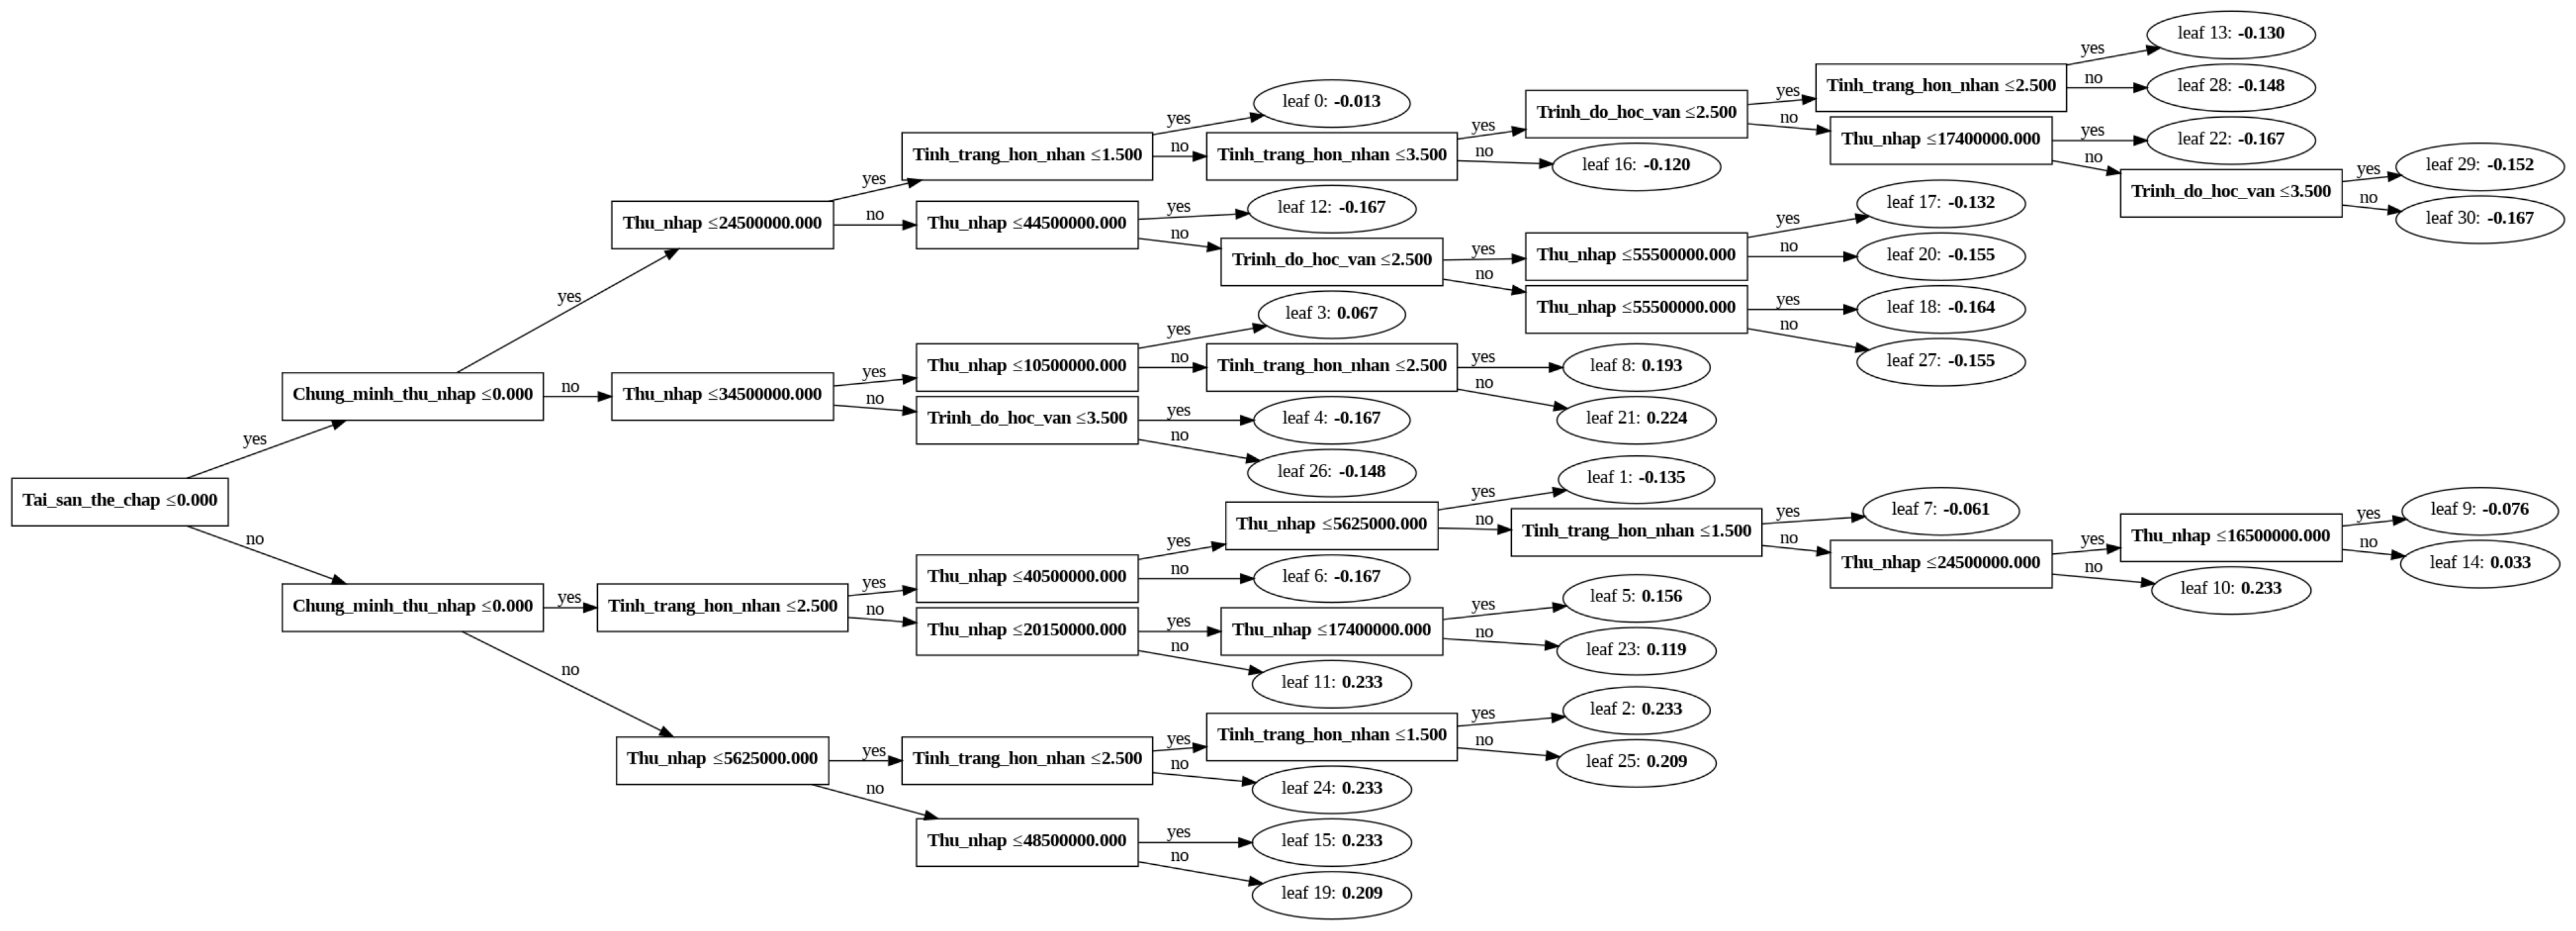

In [ ]:
lgb.plot_tree(LGBMClassifier,figsize=(50,80))

### **f. NAIVE BAYES**

#### **Prediction**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Xây dựng mô hình Naive Bayes
NB_classifier = GaussianNB()

# Đưa giá trị X_train và y_train vào mô hình Naive Bayes
NB_classifier.fit(X_train, y_train.values.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = NB_classifier.predict(X_train)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train,y_pred))

print('Naive Bayes accuracy: ', accuracy_score(y_train, y_pred))

Confusion matrix:
     0     1
0  948    85
1   38  1028 

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1033
           1       0.92      0.96      0.94      1066

    accuracy                           0.94      2099
   macro avg       0.94      0.94      0.94      2099
weighted avg       0.94      0.94      0.94      2099

Naive Bayes accuracy:  0.9414006669842783


In [ ]:
# Dự báo giá trị biến phụ thuộc
y_pred = NB_classifier.predict(X_test)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Naive Bayes accuracy: ', accuracy_score(y_test, y_pred))

Confusion matrix:
     0    1
0  404   35
1   14  447 

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       439
           1       0.93      0.97      0.95       461

    accuracy                           0.95       900
   macro avg       0.95      0.94      0.95       900
weighted avg       0.95      0.95      0.95       900

Naive Bayes accuracy:  0.9455555555555556


#### **ROC Curve**

<ipython-input-52-a448ee95e799>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-52-a448ee95e799>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


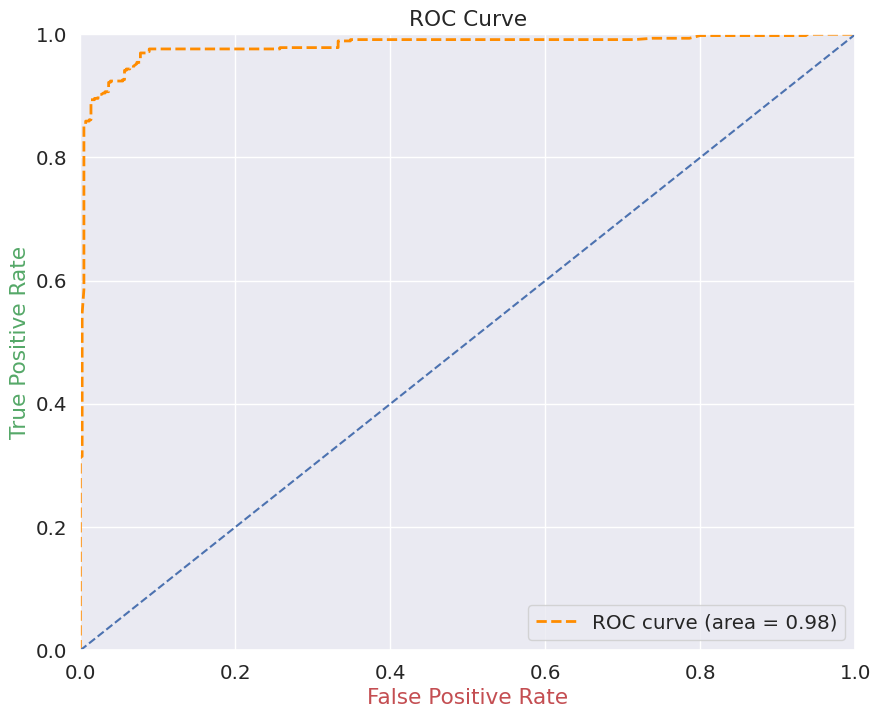

In [ ]:
y_pred_prob_test = NB_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
_plot_roc_curve(fpr, tpr, thres, roc_auc)

#### **The probability distributions**

*Features that exhibit significant differences in the conditional probability distributions across different classes could be considered important for classification.*

In [ ]:
# Get the class labels
classes = NB_classifier.classes_

# Get the conditional probability distributions for each feature and class
feature_distributions = []
for feature_idx, feature_name in enumerate(X.columns):
    feature_dist = []
    for class_idx, class_label in enumerate(classes):
        class_feature_prob = NB_classifier.theta_[class_idx, feature_idx]
        feature_dist.append((class_label, class_feature_prob))
    feature_distributions.append((feature_name, feature_dist))

# Sort the features by the absolute difference in probabilities between classes
sorted_features = sorted(feature_distributions, key=lambda x: abs(x[1][0][1] - x[1][1][1]), reverse=True)

# Display the sorted feature distributions
for feature_dist in sorted_features:
    feature_name = feature_dist[0]
    class0_prob = feature_dist[1][0][1]
    class1_prob = feature_dist[1][1][1]
    print(f"Feature: {feature_name}")
    print(f"Class 0 Probability: {class0_prob}")
    print(f"Class 1 Probability: {class1_prob}")
    print()

Feature: Tai san the chap
Class 0 Probability: -0.8222198474605805
Class 1 Probability: 0.7967665125954636

Feature: Chung minh thu nhap
Class 0 Probability: -0.8096539308404713
Class 1 Probability: 0.7845895971465462

Feature: Tinh trang hon nhan
Class 0 Probability: -0.520761699506707
Class 1 Probability: 0.5046405587152136

Feature: Thu nhap
Class 0 Probability: 0.4281006562014238
Class 1 Probability: -0.4148480092458439

Feature: Trinh do hoc van
Class 0 Probability: -0.41790073393955235
Class 1 Probability: 0.40496384442735306



## **5. Algorithm Comparison**

Sử dụng cross validation với kfold= 10 để tìm trung bình độ chính xác của từng mô hình.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

[LightGBM] [Info] Number of positive: 959, number of negative: 930
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 1889, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507676 -> initscore=0.030706
[LightGBM] [Info] Start training from score 0.030706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 959, number of negative: 930
[LightGBM]

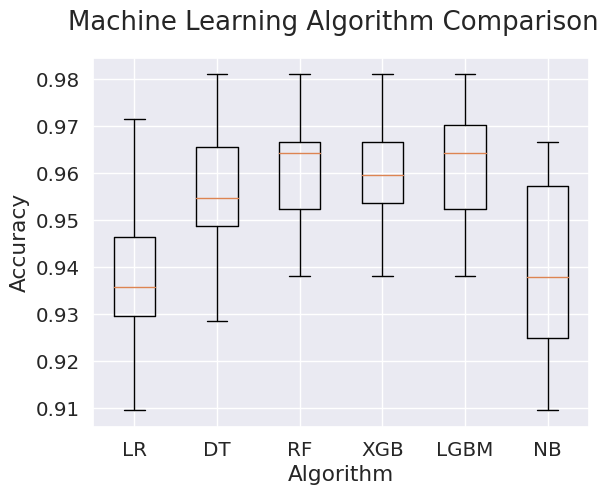

In [ ]:
# Define the models to evaluate
models = [
    ('LR', LogisticRegression()),
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('XGB', XGBClassifier()),
    ('LGBM', lgb.LGBMClassifier()),
    ('NB', GaussianNB()),
]

# Evaluate each model on the test set using 10-fold cross-validation and store the results
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

# Generate a boxplot comparing the model performance
fig = plt.figure()
fig.suptitle('Machine Learning Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()


The average accuracy after cross-validation of all models are quite similar. Among them, the Naive Bayes model has the lowest accuracy. The XGBoost and LightGBM models have higher accuracy than the remaining models, showing that the ability to predict default risk of these two models provides reliable results. The Decision Tree model and the Random Forest model have stable accuracy and do not differ significantly from each other. Besides, the Decision Tree model also helps to visualize lending decisions easily, making it easy to understand and easily make decisions about loans for individual customers.


In [ ]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
disp = RocCurveDisplay.from_estimator(LR_classifier, X_test, y_test)
RocCurveDisplay.from_estimator(DT_classifier, X_test, y_test, ax = disp.ax_);
RocCurveDisplay.from_estimator(RF_classifier, X_test, y_test, ax = disp.ax_);
RocCurveDisplay.from_estimator(XGB_classifier, X_test, y_test, ax = disp.ax_);
RocCurveDisplay.from_estimator(LGBMClassifier, X_test, y_test, ax = disp.ax_);
RocCurveDisplay.from_estimator(NB_classifier, X_test, y_test, ax = disp.ax_);

We can see that the accuracies for all models are quite equivalent. The model with the higher AUC score will be more reliable because it takes into account the predicted probability. It is more likely to give us higher accuracy when predicting future customers. It is evident from the plot that the AUC for the XGBoost and Random Forest ROC curve are higher than that of the other curves, with the AUC of 0.99. Therefore, Random Forest and XGBoost models will have a better job of classifying the positive class in the dataset.


# **V. RESAMPLING**

## **1. Upsampling**

In [ ]:
import imblearn
print(imblearn.__version__)

0.10.1


In [ ]:
from imblearn.over_sampling import SMOTE
# Upsampling
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

In [ ]:
# Đưa giá trị X_train_resample và y_train_resample vào mô hình Decision Tree (sau khi Upsampling)
DT_classifier.fit(X_train_resample, y_train_resample.values.ravel())
DT_classifier.fit(X_train_resample, y_train_resample.values.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = DT_classifier.predict(X_train_resample)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train_resample,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_train_resample,y_pred))

print('Decision Tree accuracy: ', round(accuracy_score(y_train_resample, y_pred),4))


Confusion matrix:
      0     1
0  1053    13
1    36  1030 

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1066
           1       0.99      0.97      0.98      1066

    accuracy                           0.98      2132
   macro avg       0.98      0.98      0.98      2132
weighted avg       0.98      0.98      0.98      2132

Decision Tree accuracy:  0.977


In [ ]:
# Đưa giá trị X_train_resample và y_train_resample vào mô hình Decision Tree (sau khi Upsampling)
DT_classifier.fit(X_train_resample, y_train_resample.values.ravel())
DT_classifier.fit(X_train_resample, y_train_resample.values.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = DT_classifier.predict(X_test)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Decision Tree accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
     0    1
0  429   10
1   53  408 

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       439
           1       0.98      0.89      0.93       461

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900

Decision Tree accuracy:  0.93


**When using the upsampling technique, the performance of the Decision Tree model decreases slightly compared to the initial sample 🡪 Upsampling is not necessary for the model.**


## **2. Over sampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [ ]:
print('Predict on over-sampling trainning set')
DT_classifier.fit(X_train_over, y_train_over.values.ravel())
y_pred_train_over = DT_classifier.predict(X_train_over)
print(confusion_matrix(y_train_over,y_pred_train_over))
print(classification_report(y_train_over,y_pred_train_over))
print('Decision Tree accuracy: ', accuracy_score(y_train_over, y_pred_train_over))

Predict on over-sampling trainning set
[[1053   13]
 [  36 1030]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1066
           1       0.99      0.97      0.98      1066

    accuracy                           0.98      2132
   macro avg       0.98      0.98      0.98      2132
weighted avg       0.98      0.98      0.98      2132

Decision Tree accuracy:  0.9770168855534709


In [ ]:
print('Predict on testing set')
y_pred = DT_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

Predict on testing set
[[429  10]
 [ 53 408]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       439
           1       0.98      0.89      0.93       461

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900

Decision Tree accuracy:  0.93


**Độ chính xác của mô hình sau khi thực hiện Oversampling không được cải thiện so với ban đầu => Oversampling là không cần thiết.**

## **3. Under Sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X, y)

In [ ]:
DT_classifier.fit(X_train_under, y_train_under.values.ravel())

y_pred_train_under = DT_classifier.predict(X_train_under)
print(confusion_matrix(y_train_under,y_pred_train_under))
print(classification_report(y_train_under,y_pred_train_under))
print('Decision Tree accuracy: ', accuracy_score(y_train_under, y_pred_train_under))

[[1454   18]
 [  39 1433]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1472
           1       0.99      0.97      0.98      1472

    accuracy                           0.98      2944
   macro avg       0.98      0.98      0.98      2944
weighted avg       0.98      0.98      0.98      2944

Decision Tree accuracy:  0.9806385869565217


In [ ]:
y_pred = DT_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

[[409  30]
 [ 56 405]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       439
           1       0.93      0.88      0.90       461

    accuracy                           0.90       900
   macro avg       0.91      0.91      0.90       900
weighted avg       0.91      0.90      0.90       900

Decision Tree accuracy:  0.9044444444444445


**When using the under sampling technique, the performance of the Decision Tree model decreases compared to the initial sample 🡪 Under sampling is not necessary for the model.**

# **VI. CONCLUSIONS**
   * In the case of credit risk prediction, the Decision Tree model can help identify the most important factors that contribute to creditworthiness. It is a powerful tool for predicting credit risk because it is easy to understand, versatile, and computationally efficient, and can provide valuable insights for decision-makers. This model can be easily visualized, which makes it useful for communicating the results of credit risk analyses to stakeholders so that this can help decision-makers to understand the factors that contribute to credit risk and make informed decisions about lending. The results and evaluation indicators of the machine learning models used to predict the debt repayment ability in this report give very high results, showing that the predictive ability of the models is very reliable. The XGBoost, LightGBM and Decision Tree models have more stable results and higher predictive performance than the other models. However, the Decision Tree model can be intuitively understood and makes it easier for credit officers to optimize the customer assessment process and make smart decisions about loan granting and credit risk management.
   * In this report, the author demonstrated the use of machine learning algorithms on a simulation dataset to predict loan repayment ability. To achieve the best performance, this study showed that data pre-processing, a careful selection of techniques for balancing dataset and classification algorithms are all very important. Logistic regression, Decision Tree, Random Forest, XGBoost, LightGBM and Naive Bayes work quite well on this data set. In the future, the author wants to continue exploring more sophisticated learning algorithms and dimension reduction techniques, selecting suitable hyperparameters to further improve model performance on this important prediction task.
   * Model development directions: Based on model evaluation, we can adjust the hyperparameters of machine learning models to optimize or improve the model. For example, we can adjust the depth of the tree, the minimum number of samples required to split the node. Tweaking these parameters improves the predictability of the model and minimizes overfitting. Using ensemble techniques such as Bagging, Random Forest, or Boosting to combine multiple decision trees. The use of these techniques reduces model volatility and improves predictability on new data. In addition, determining an appropriate cut-off to predict credit risk helps strike a balance between making the wrong decision about risk and making the wrong decision about the customer's ability to repay. Finally, we should research other models to find the best model for credit classification problem.
